# <font color='red'> Project 1 Akash Gupta - AXG170018 & Eshaan Thakar - EAT170005

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear). 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Use GridSearchCv and corss-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

# Regression Task:
### Datset: House Prices: Advanced Regression Techniques
### Regression Problem: Predict sales prices of Iowa Housing.
### Source: Kaggle-Competition Dataset
## Evaluation Strategy used is based on Avg Training Score,Avg Testing Score and the best RMSE value 
## Model Evaluation Technique:  Cross Validation and Grid Search to get the best Hyperparameters

### Importing the Libraries that are Required and Setting Global Values:

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression, SGDRegressor
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## IMPORT DATASET

A first look at the data and a validation strategy
The goal here is only to get an idea about the structure, the data types, the missing values. We should try to not take any decisions just yet because we did not set up any validation strategy yet.

Note also that we do not load the test set, for the purposes of this notebook the test set is needed only for the final submission. Imagine the test set as the one that your client sends you a month after you delivered your model.

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

## we have a good combination of numerical, ordinal, and categorical features (which is also why this is a good competition to start with). We also have quite a few missing values (most of which are explained in the data description).

## Now we will check for % of missing values in the entire dataset

In [5]:
print("Percentage missing values across the dataset: %5.4f" % (df.isna().mean().mean()*100),"%", sep='')

Percentage missing values across the dataset: 5.8896%


## We can see that our dataset has 5.8896% of missing values in total 

  ### Now we will check missing values across each column:

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [7]:
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

In [8]:
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageYrBlt,GarageYrBlt,5.547945
GarageCond,GarageCond,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


## Now we check the Distribution of Data amongst each of the columns in the data

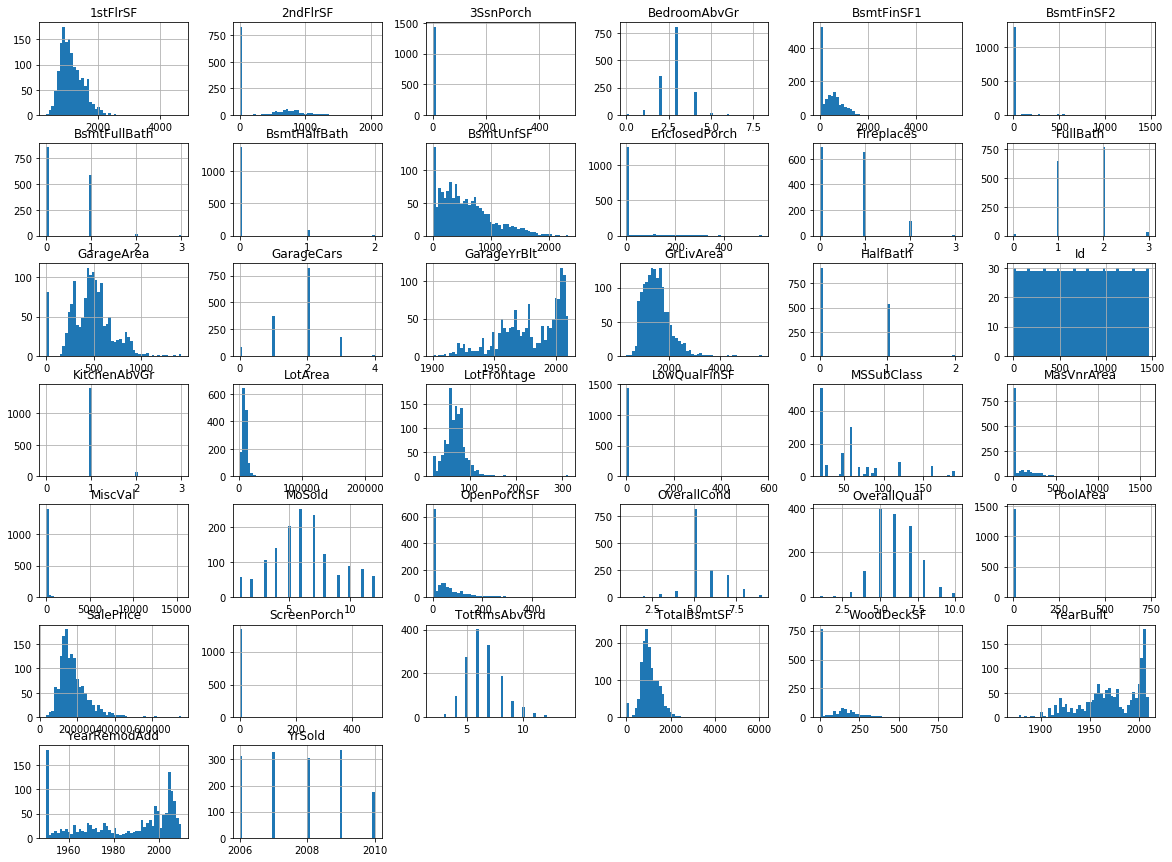

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## All the information I want to get from these plots are about odd distributions, not only I see there is a skew in some continuous variables, but also that some features have mostly one value.

### One way to remove the skeweness is to simply take the logarithm of the variable.
# This is what we are going to do now with the target variable : SalePrice

Text(0.5, 1.0, 'SalePrice before Log Transformation')

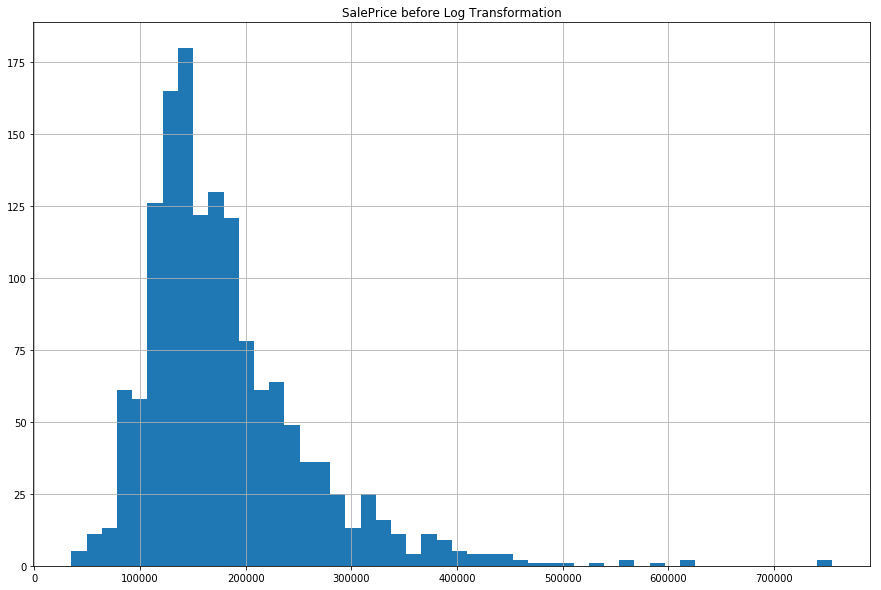

In [10]:
df.SalePrice.hist(bins=50, figsize=(15,10))
plt.title("SalePrice before Log Transformation")

## Sales Price After Log Transformation Distribution :

In [11]:
df['target'] = np.log1p(df.SalePrice)
del df['SalePrice']

Text(0.5, 1.0, 'SalePrice after Log Transformation')

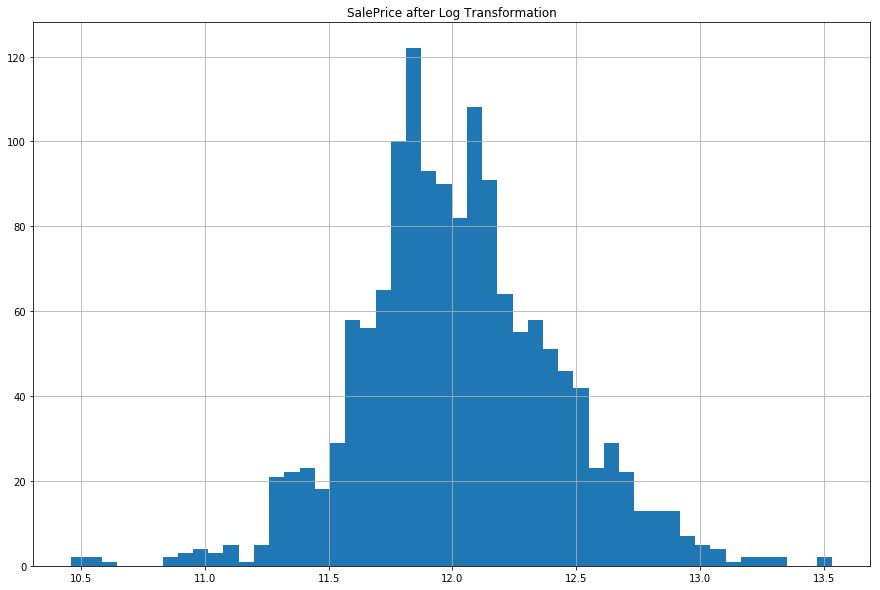

In [12]:
df.target.hist(bins=50, figsize=(15,10))
plt.title("SalePrice after Log Transformation")

In [13]:
df.OverallQual.head(2)

0    7
1    6
Name: OverallQual, dtype: int64

In [14]:
count=0
for column in df.columns:
    if df[column].dtype == object:
        count=count+1
        print("'"+column+"'",end=',')

'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition',

In [15]:
print("Number of Categorical Variables: ",count)

Number of Categorical Variables:  43


In [16]:
list3=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition',]

## In order to get list of names of all Continuous Variables 

In [17]:
count_cont=0
for column in df.columns:
    if df[column].dtype != object:
        count_cont=count_cont+1
        print("'"+column+"'",end=',')

'Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','target',

In [18]:
print("Number of Continuos Variables: ",count_cont)

Number of Continuos Variables:  38


In [19]:
list2=['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','target']

# Now we start the process of feature engineering and Exploratory Data Analysis which will help us understand our categorical variables.

## Now we will remove all "na" values and impute na's with values based on the data behaviour such as mean.

### We have imputed all na values for Alley to "No Alley Access" which suggests that there is no alley in houses and we assign value according to that.Similarly Seeeing the documentation of the dataset we replaced categorical values which are missing as No Alley instead of removing them completely.

We can see that categorical columns Alley, FireplaceQu, PoolQC, Fence & MiscFeature have nan values.<br />
For Alley column NaN means No alley access. So here we can impute NaN with new category No alley access.<br />
For FireplaceQu column NaN is No Fireplace. So here we can impute NaN with new category No Fireplace.<br />
For PoolQC column NaN is No Pool. So here we can impute NaN with new category No Pool.<br />
For Fence column NaN is No Fence. So here we can impute NaN with new category No Fence.<br />
For MiscFeature column NaN means No features like Elevator, tennis court, shed etc. So here we can impute NaN with new category No MiscFeature.<br />
For Utilities column we don't know what NaN means. So here since its a categorical column we can impute NaN with mode value.<br />

In [20]:
df.Alley.replace(np.nan,"No Alley Access", inplace = True)
df.Alley.unique()

array(['No Alley Access', 'Grvl', 'Pave'], dtype=object)

In [21]:
df.FireplaceQu.replace(np.nan,"No Fireplace", inplace = True)
df.FireplaceQu.unique()

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [22]:
df.PoolQC.replace(np.nan,"No Pool", inplace = True)
df.PoolQC.unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [23]:
df.Fence.replace(np.nan,"No Fence", inplace = True)
df.Fence.unique()

array(['No Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [24]:
df.MiscFeature.replace(np.nan,"No MiscFeature", inplace = True)
df.MiscFeature.unique()

array(['No MiscFeature', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [25]:
df.BsmtCond.replace(np.nan, "No Basement", inplace = True)
df.BsmtCond.unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [26]:
df.BsmtExposure.replace(np.nan, "No Basement", inplace = True)
df.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'No Basement'], dtype=object)

In [27]:
df.BsmtFinType1.replace(np.nan, "No Basement", inplace = True)
df.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No Basement', 'LwQ'],
      dtype=object)

In [28]:
df.BsmtFinType2.replace(np.nan, "No Basement", inplace = True)
df.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'No Basement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

In [29]:
df.BsmtQual.replace(np.nan, "No Basement", inplace = True)
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [30]:
df.Electrical.replace(np.nan, df.Electrical.mode()[0], inplace = True)
df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [31]:
df.Exterior1st.replace(np.nan, df.Exterior1st.mode()[0], inplace = True)
df.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [32]:
df.Exterior2nd.replace(np.nan, df.Exterior2nd.mode()[0], inplace = True)
df.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [33]:
df.Functional.replace(np.nan, df.Functional.mode()[0], inplace = True)
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [34]:
df.GarageFinish.replace(np.nan, "No Garage", inplace = True)
df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'No Garage'], dtype=object)

In [35]:
df.GarageQual.replace(np.nan, "No Garage", inplace = True)
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [36]:
df.GarageQual.replace(np.nan, "No Garage", inplace = True)
df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [37]:
df.GarageType.replace(np.nan, "No Garage", inplace = True)
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No Garage', 'Basment',
       '2Types'], dtype=object)

In [38]:
df.GarageCond.replace(np.nan, "No Garage", inplace = True)
df.GarageCond.unique()

array(['TA', 'Fa', 'No Garage', 'Gd', 'Po', 'Ex'], dtype=object)

In [39]:
df.KitchenQual.replace(np.nan, "TA", inplace = True)
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [40]:
df.MSZoning.replace(np.nan, df.MSZoning.mode()[0], inplace = True)
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [41]:
df.MasVnrType.replace(np.nan, df.MasVnrType.mode()[0], inplace = True)
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [42]:
df.SaleType.replace(np.nan, df.SaleType.mode()[0], inplace = True)
df.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [43]:
df.Utilities.replace(np.nan, df.Utilities.mode()[0], inplace = True)
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

## CentralAir coulmn has only Y/N values so we cant encode them directly as Y=1 and N=0

In [44]:
df.CentralAir.replace("N", 0, inplace = True)
df.CentralAir.replace("Y", 1, inplace = True)
df.CentralAir.unique()

array([1, 0])

### This the final dataset we get which has categorical columns without na values

In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,12.429220


In [46]:
df.shape

(1460, 81)

## Now we work for continuos variables 
### We first look for na values in columns and impute them with mean values of that column.
#### Here we can see that " LotFrontage " ," GarageYrBlt " and " MasVnrArea " have na values which are imputed with the mean value of the respective columns.

In [47]:
df.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
target            0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
YearRemodAdd      0
YearBuilt         0
Heating           0
Utilities         0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
Alley             0
LotShape          0
               ... 
PoolArea          0
GarageCars        0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
GarageArea        0
GarageFinish      0
CentralAir        0
FullBath          0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0


## Filling Na values with mean values

In [48]:
new_df=df.fillna(df.mean())

In [49]:
new_df.shape

(1460, 81)

In [50]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,12.429220


# We can see now we have no Na values in the dataset

In [51]:
new_df.isna().sum().sort_values(ascending=False)

target          0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

## Now we will do Exploratory Data Analaysis to check whether we shoud one hot encode or prefer label encoding for our independant variables.

### If the distribution of that feature lies pretty far from the mean distribution of different levels in a category we will have to do Label encoding as then we will treat that feature as Ordinal.
### Otherwise we will treat that feature as Nominal and One hot Encode it.

# In order to show you we do a scatterplot of the Independant feature "MSZoning" with the Dependant variable SalePrice(earlier) now "target"

In [52]:
new_df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [53]:
          ###### DATA DESCRIPTION
    
  # A    Agriculture
  # C    Commercial
  # FV   Floating Village Residential
  # I    Industrial
  # RH   Residential High Density
  # RL   Residential Low Density
  # RP   Residential Low Density Park 
  # RM   Residential Medium Density


# MSZoning

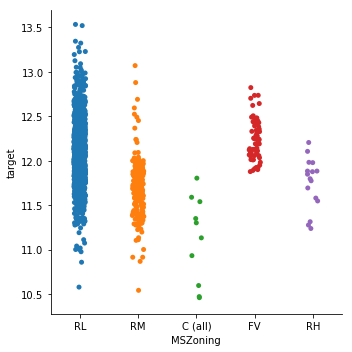

In [54]:
import seaborn as sns
sns.catplot(x="MSZoning", y="target", data=new_df);

## Seeing the above plot we conclude that we will treat this as Nominal because the variation in the mean values for each leve within this variable is not too far from each other.

# Street

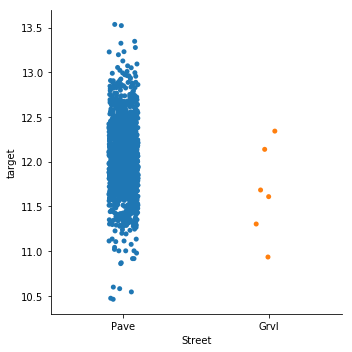

In [55]:
import seaborn as sns
sns.catplot(x="Street", y="target", data=new_df);

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


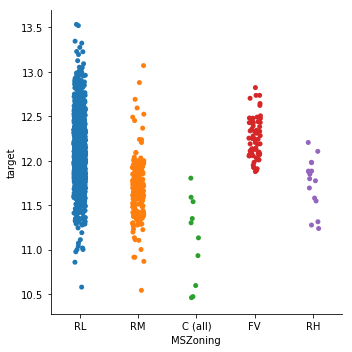

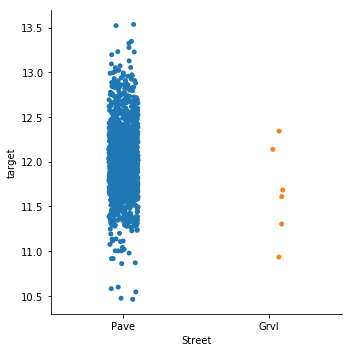

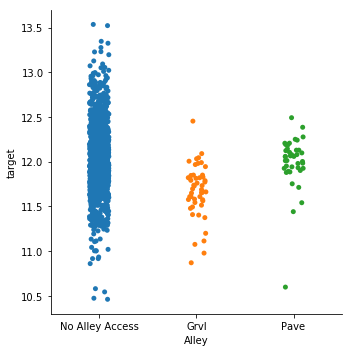

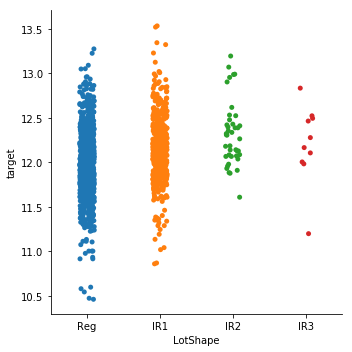

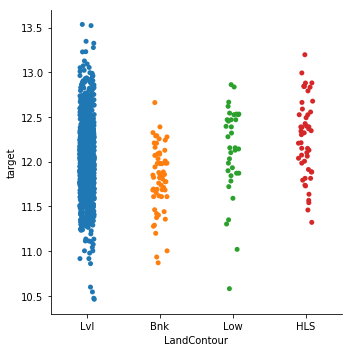

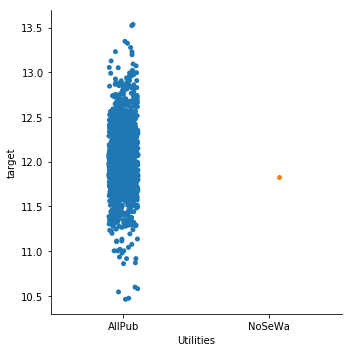

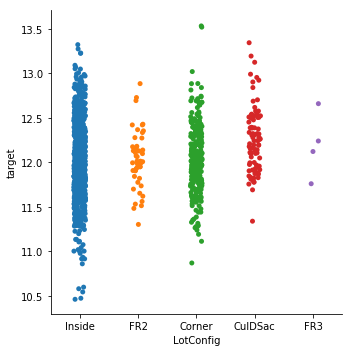

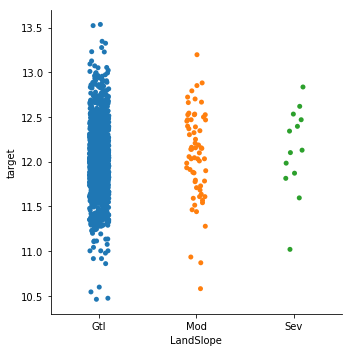

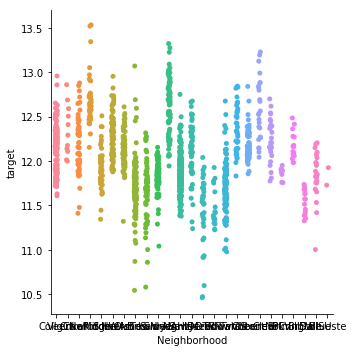

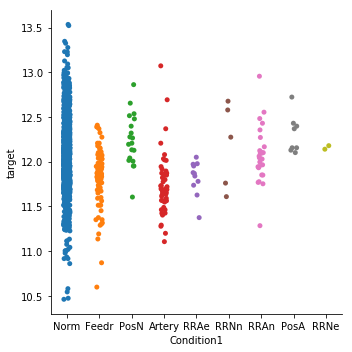

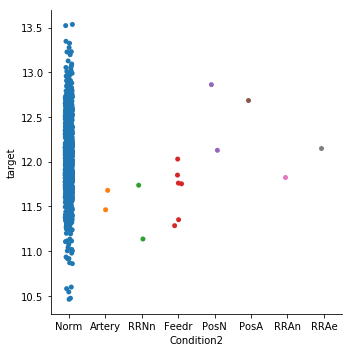

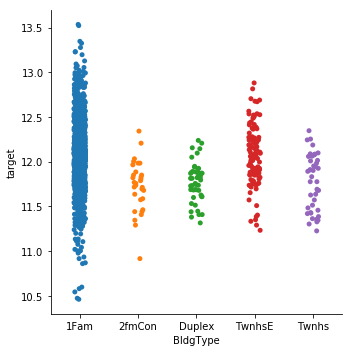

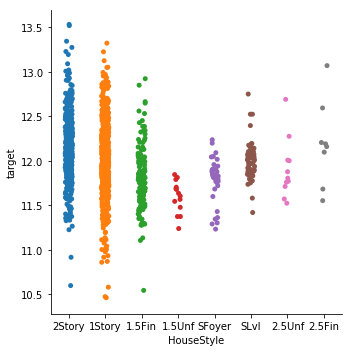

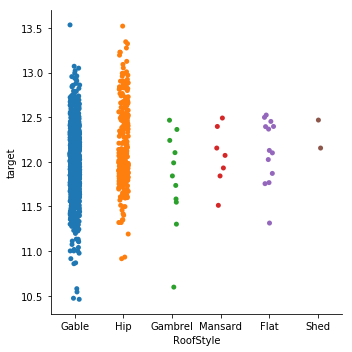

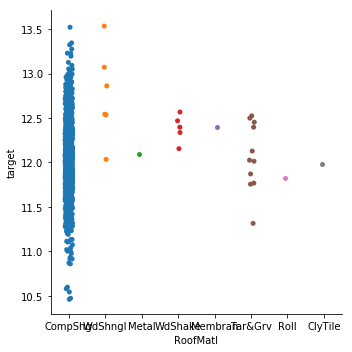

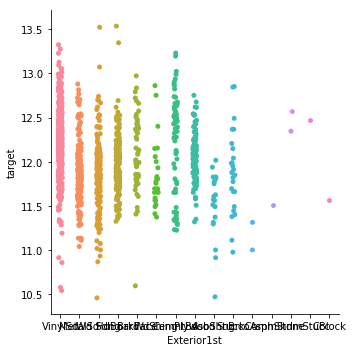

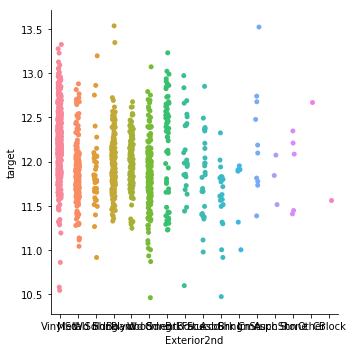

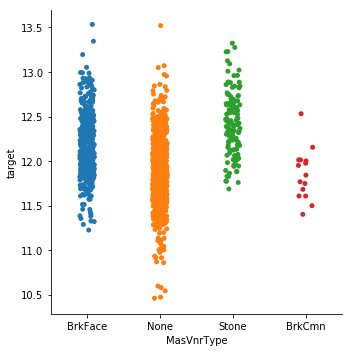

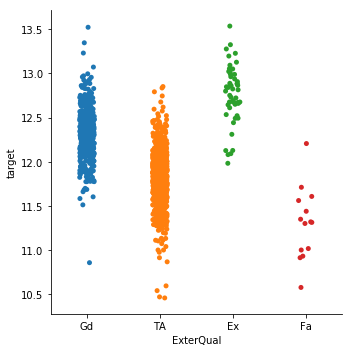

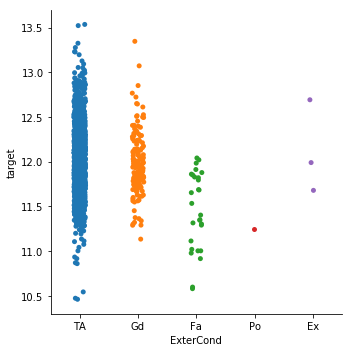

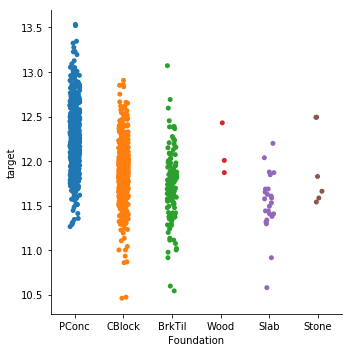

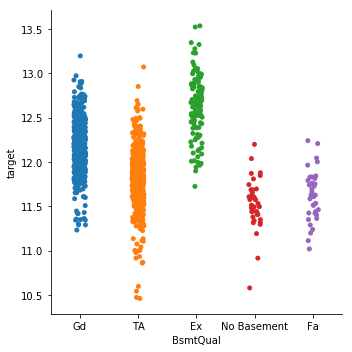

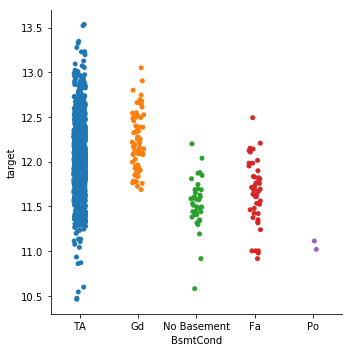

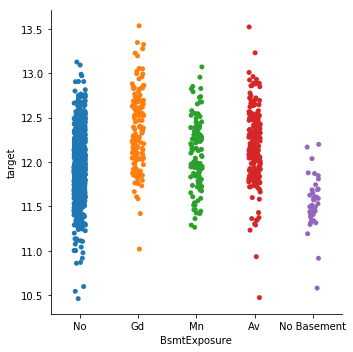

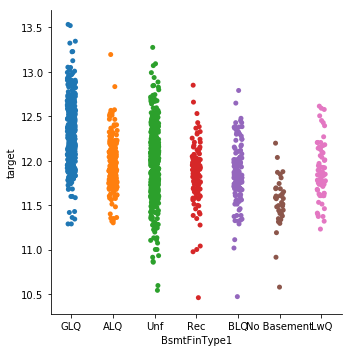

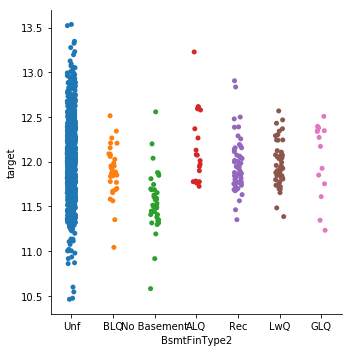

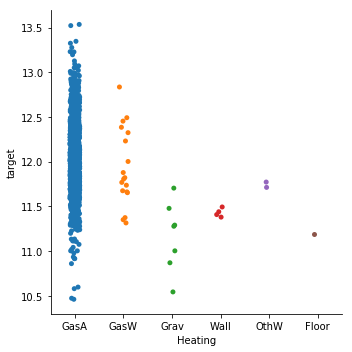

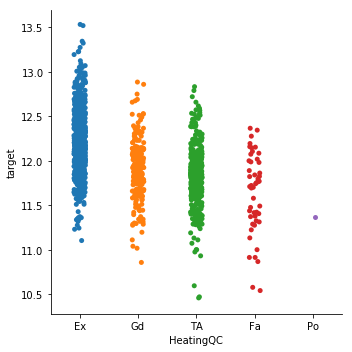

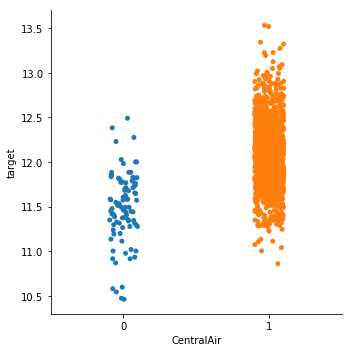

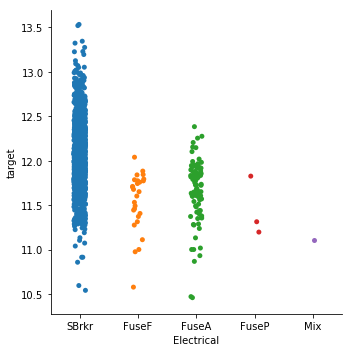

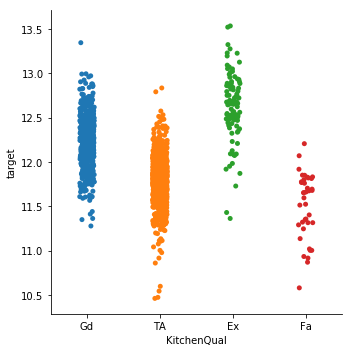

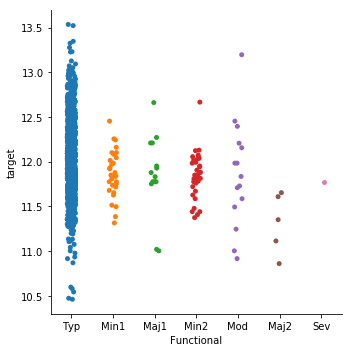

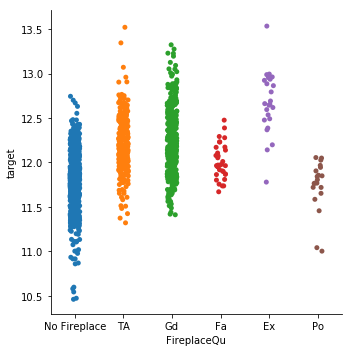

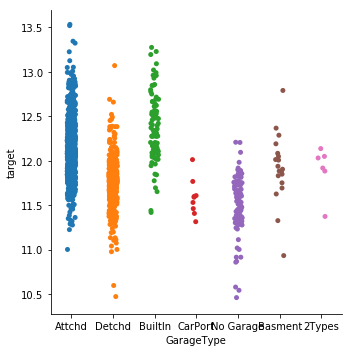

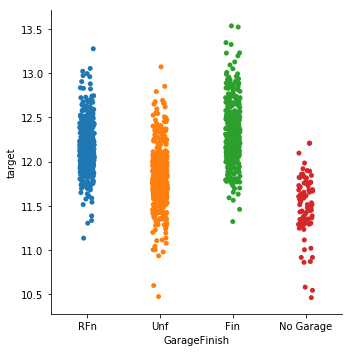

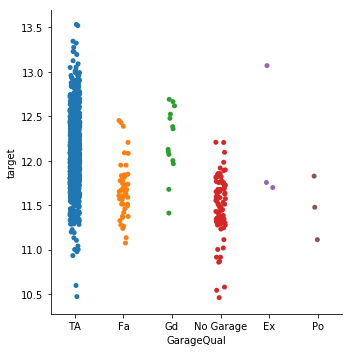

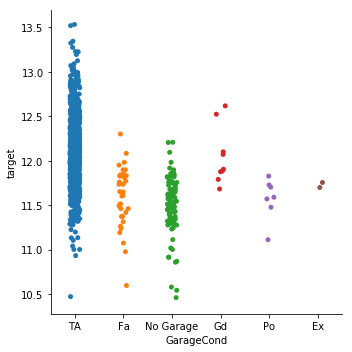

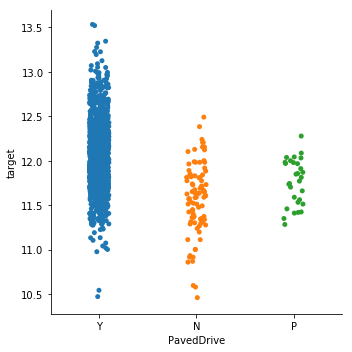

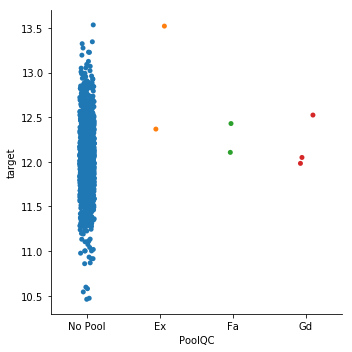

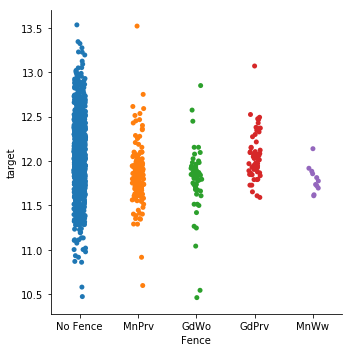

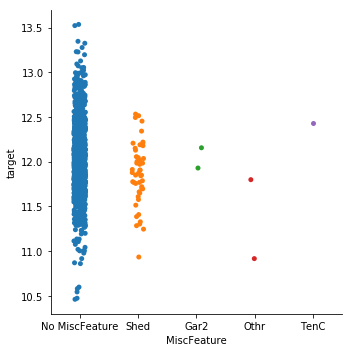

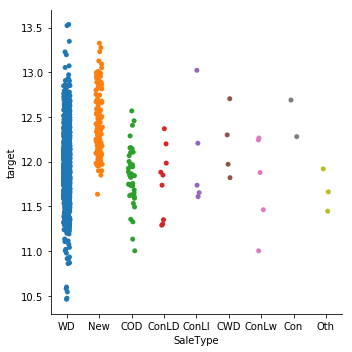

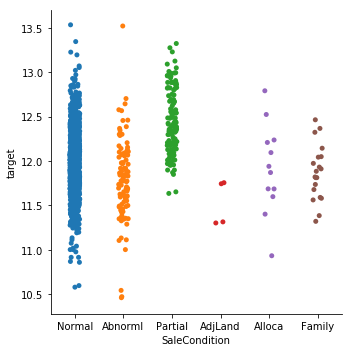

In [56]:
#list3 is the list with all names of categorical columns and we explore ere which columns should be taken as 
#ordinal and which ones should be taken as nominal .
for col in list3:
    sns.catplot(x=col, y="target", data=new_df);

## Now we check the mean values whether our plotted data has significantly different mean values for each level in a category which will help us in knowing which column would be suitable for label encoding and which one for one hot encoding.

In [57]:
lst_means = []
for column in list3:
    print(new_df[["target",column]].groupby(column).mean())
    #lst_means.append(df[["target",column]].groupby(column).mean()['target'].tolist())
    #print(pd.Series(lst_means[-1],index=df[column].unique()))

             target
MSZoning           
C (all)   11.118275
FV        12.246621
RH        11.749848
RL        12.085891
RM        11.692901
           target
Street           
Grvl    11.667444
Pave    12.025529
                    target
Alley                     
Grvl             11.673363
No Alley Access  12.037682
Pave             11.996819
             target
LotShape           
IR1       12.163471
IR2       12.318455
IR3       12.205419
Reg       11.936101
                target
LandContour           
Bnk          11.810748
HLS          12.259262
Low          12.120092
Lvl          12.022700
              target
Utilities           
AllPub     12.024189
NoSeWa     11.831386
              target
LotConfig           
Corner     12.027452
CulDSac    12.249815
FR2        12.034748
FR3        12.195689
Inside     12.001906
              target
LandSlope           
Gtl        12.020571
Mod        12.076873
Sev        12.130567
                 target
Neighborhood           
Blmngtn    

## Now we check for continuos variables for outliers using simple describe function to understand their distribution from mean 

In [58]:
new_df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,...,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,No Alley Access,Reg,Lvl,AllPub,...,NaN,No Pool,No Fence,No MiscFeature,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,...,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,12.024057
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,0.399449
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460271
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,11.775105
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001512
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273736


# We notice that we have few columns which are having min and max values which are 3 Std Deviations far from the mean values.
## We also have to keep in mind the size of our dataset.We cannot trade off data at this time with these continuous values.

### For continuous data we now check mean and using this we will check for outliers .If value lies beyong 3 std deviations from the mean we should consider it as an outlier.

In [59]:
new_df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,...,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,...,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,No Alley Access,Reg,Lvl,AllPub,...,NaN,No Pool,No Fence,No MiscFeature,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,...,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,12.024057
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,0.399449
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,10.460271
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,11.775105
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,12.001512
75%,1095.250000,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,12.273736


In [60]:
new_df.shape

(1460, 81)

## We will check for outiers and how much is it affecting size of the data 

In [61]:
## Now removing the outliers and keeping data in a new dataframe
Cont_clean=new_df

In [62]:
from scipy import stats

def drop_numerical_outliers(Cont_clean, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    #constrains = new_df_clean.select_dtypes(include=[np.number]) \
    constrains = Cont_clean[''] \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    Cont_clean.drop(Cont_clean.index[~constrains], inplace=True)


## We see that we loose a lot of data when we remove outliers based on 3 standard deviations therefore we do not keep this but we include each data point so that we can generalize our model for ur testing data as well

In [64]:
Cont_clean.shape

(1460, 81)

# Till here we have halted for outliers--------------------------------------------

In [65]:
new_df.shape

(1460, 81)

In [66]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [67]:
new_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,12.429220


# Now we create dummies for our categorical columns as we have accomplished our data cleaning process for now

In [68]:
new_df_encoded = pd.get_dummies(new_df, drop_first=True)

In [69]:
new_df_encoded.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,target,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,

## After creating dummies for our categorical variables we notice that we have now 261 columns

In [70]:
new_df_encoded.shape

(1460, 261)

### We will also check whether our dataframe has 0 null values as we will then calculate correlation amongst the variables

In [71]:
new_df_encoded.isna().sum().sum()

0

## Now we will remove all columns which have correlation greater than 0.95 

In [72]:
# Create correlation matrix
corr_matrix = new_df_encoded.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
new_df_encoded.drop(columns = to_drop, axis=1, inplace = True)

In [73]:
new_df_encoded.shape

(1460, 247)

# MODELLING

## Now we will split data to for feature selection using lasso and further modelling

In [77]:
features = new_df_encoded.columns.tolist()
features.remove("target")
target = 'target'

In [165]:
X = new_df_encoded[features]
y = new_df_encoded[target]

In [166]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [167]:
X_train = pd.DataFrame(X_train, index=new_df_encoded[features].index, columns=new_df_encoded[features].columns)

In [168]:
y=new_df_encoded['target']

In [169]:
y.head(4)

0    12.247699
1    12.109016
2    12.317171
3    11.849405
Name: target, dtype: float64

In [170]:
X_train.isna().sum().sum()

0

In [84]:
reporting_df = pd.DataFrame(columns=["Regressor", "Avg Train Score", "Avg Test Score", "Avg RMSE", "Best Hyperparameters"])

# We have to scale our data using MinMaxScaler and also Subset our data using Grid Search to avoid overfitting in the data

# now we check for best alpha using grid search

# Bagging (Decisison Tree and Ridge)

In [ ]:
# Decisison Tree Regressor 

In [88]:
parameters = [{'max_depth':np.arange(1, 21), 'min_samples_leaf':[1, 5, 10, 20, 50, 100]}]

grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.034172395096479485
Grid search best parameters: {'max_depth': 11, 'min_samples_leaf': 10}


In [90]:
# Add normal decision tree regression code 

Train score: [0.8970235363012055, 0.8953838417242924, 0.8926580020357934, 0.8976822756294542, 0.9024402361800345]
Test score: [0.7936117705557734, 0.7703341271169902, 0.796319832325719, 0.8229025200004118, 0.7464044166207662]
Root Mean squared error: [0.1756092357657218, 0.2037321947120261, 0.18487086284198292, 0.16008497112708414, 0.19695160381125076]
Average training score for Decision Tree Regression using cross validation: 0.897037578374156
Average testing score for Decision Tree Regression using cross validation: 0.785914533323932
Average RMSE for Decision Tree Regression using cross validation: 0.18424977365161316


In [ ]:
# Bagging to get best parameters

In [92]:
from sklearn.ensemble import BaggingRegressor
parameters = {'n_estimators': [50,100,200,500,1000],
              'max_samples': [50,100,200,400,500,1000]}

grid_search = GridSearchCV(estimator = BaggingRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
grid_search = grid_search.fit(X_train,y)
print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.020885935391461913
Grid search best parameters: {'max_samples': 1000, 'n_estimators': 500}


# Bagging Regressor on Decision Trees

In [97]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    
    dtr = DecisionTreeRegressor(max_depth=11, min_samples_leaf=10)
    bag_reg = BaggingRegressor(dtr, n_estimators=500, max_samples=1000, bootstrap=True, n_jobs=-1, random_state=0)

    bag_reg.fit(X_train_cv, y_train_cv)
    train_score_list.append(bag_reg.score(X_train_cv,y_train_cv))
    test_score_list.append(bag_reg.score(X_test_cv, y_test_cv))
    
    y_preds = bag_reg.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Decision Tree Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Decision Tree Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Decision Tree Regression using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"DecisionTree", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9057693275162656, 0.9086177081105884, 0.9048847479795628, 0.9039601275248068, 0.9089373477136412]
Test score: [0.856168029832036, 0.8565139204892721, 0.8511535562689525, 0.8624868043152198, 0.8297158620779478]
Root Mean squared error: [0.14659953909066298, 0.16103353079981916, 0.15803865601112224, 0.14106411828871765, 0.16138968591898395]
Average training score for Decision Tree Regression using cross validation: 0.9064338517689728
Average testing score for Decision Tree Regression using cross validation: 0.8512076345966856
Average RMSE for Decision Tree Regression using cross validation: 0.1536251060218612


## Model 2 (Ridge Regressor)

In [99]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,200,500,1000],
              'max_samples': [50,100,200,400,500,1000]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 1000, 'n_estimators': 200}
Best cross-validation score: 0.87


In [ ]:
# best parameters from ridge regression:
# alpha : 5

In [ ]:
# now we train bagging regressor with ridge

In [101]:
train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
   
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    ridge = Ridge(alpha=5)
    bag_reg = BaggingRegressor(ridge, n_estimators=200, max_samples=1000, bootstrap=True, n_jobs=-1, random_state=0)

    bag_reg.fit(X_train_cv,y_train_cv)
    train_score_list.append(bag_reg.score(X_train_cv,y_train_cv))
    test_score_list.append(bag_reg.score(X_test_cv, y_test_cv))
    
    y_preds = bag_reg.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Ridge using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Ridge using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Ridge using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Ridge", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.911925728687384, 0.9175387646306181, 0.9130320272445575, 0.913117610439262, 0.9249462935655657]
Test score: [0.9000904314525651, 0.8699661969430053, 0.8947849222339104, 0.8956550013257518, 0.8283230965308993]
Root Mean squared error: [0.12218233820392845, 0.1532990850385694, 0.13287188204079997, 0.12287971352942488, 0.1620483504557411]
Average training score for Ridge using cross validation: 0.9161120849134775
Average testing score for Ridge using cross validation: 0.8777639296972263
Average RMSE for Ridge using cross validation: 0.13865627385369275


# Pasting

In [ ]:
# Decision Tree Regressor 
# Best Params are : Max Depth= 11, min_samples_leaf = 10

In [103]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    
    dtr = DecisionTreeRegressor(max_depth=11, min_samples_leaf=10)
    bag_reg = BaggingRegressor(dtr, n_estimators=500, max_samples=1000, bootstrap=False, n_jobs=-1, random_state=0)

    bag_reg.fit(X_train_cv, y_train_cv)
    train_score_list.append(bag_reg.score(X_train_cv,y_train_cv))
    test_score_list.append(bag_reg.score(X_test_cv, y_test_cv))
    
    y_preds = bag_reg.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Decision Tree Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Decision Tree Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Decision Tree Regression using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"DecisionTree", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9262168377945488, 0.9280179763969517, 0.920108432925693, 0.9218342878685711, 0.929296782070449]
Test score: [0.8505642365785033, 0.8481892964996339, 0.8482809198073494, 0.8605156126452957, 0.8237925715094329]
Root Mean squared error: [0.14942806185848506, 0.16563901033198128, 0.1595563881969121, 0.14207156709833574, 0.1641726413490416]
Average training score for Decision Tree Regression using cross validation: 0.9250948634112428
Average testing score for Decision Tree Regression using cross validation: 0.846268527408043
Average RMSE for Decision Tree Regression using cross validation: 0.15617353376695114


# Ridge 

In [ ]:
# best parameter using ridge is alpha =5 

In [104]:
train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
   
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    ridge = Ridge(alpha=5)
    bag_reg = BaggingRegressor(ridge, n_estimators=200, max_samples=1000, bootstrap=False, n_jobs=-1, random_state=0)

    bag_reg.fit(X_train_cv,y_train_cv)
    train_score_list.append(bag_reg.score(X_train_cv,y_train_cv))
    test_score_list.append(bag_reg.score(X_test_cv, y_test_cv))
    
    y_preds = bag_reg.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Ridge using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Ridge using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Ridge using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"Ridge", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9147416283509897, 0.9202348062189223, 0.9158925833803672, 0.915711083616266, 0.9272124451798857]
Test score: [0.8983397654705249, 0.8697085704641928, 0.8934648391617024, 0.8951415212797238, 0.8278324262748094]
Root Mean squared error: [0.12324815987051302, 0.15345087003721158, 0.13370282366805716, 0.12318168702227825, 0.16227976065556546]
Average training score for Ridge using cross validation: 0.9187585093492862
Average testing score for Ridge using cross validation: 0.8768974245301907
Average RMSE for Ridge using cross validation: 0.1391726602507251


# ADABOOST

In [105]:
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train,y)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.029923744555961394
Grid search best parameters: {'learning_rate': 1, 'n_estimators': 100}


### Applying AdaBoost Boosting on the decision tree regressor

In [107]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    
    dtr = DecisionTreeRegressor(max_depth=11, min_samples_leaf=10)
    ada_reg = AdaBoostRegressor(dtr, n_estimators=100, learning_rate=1, random_state=0)

    ada_reg.fit(X_train_cv, y_train_cv)
    train_score_list.append(ada_reg.score(X_train_cv,y_train_cv))
    test_score_list.append(ada_reg.score(X_test_cv, y_test_cv))
    
    y_preds = ada_reg.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Decision Tree Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Decision Tree Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Decision Tree Regression using cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"DecisionTree", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9786816201988298, 0.979244895035027, 0.9791228291785253, 0.9786829439640752, 0.9785822030149829]
Test score: [0.8717880174250223, 0.8695010445427495, 0.8713576697284078, 0.8805855030791699, 0.8620459742719124]
Root Mean squared error: [0.13841055119260265, 0.15357302835126624, 0.14692173405498785, 0.1314537252254296, 0.14526328733868554]
Average training score for Decision Tree Regression using cross validation: 0.978862898278288
Average testing score for Decision Tree Regression using cross validation: 0.8710556418094525
Average RMSE for Decision Tree Regression using cross validation: 0.1431244652325944


# KNN Regressor

In [108]:
# Grid search to find the best adaboost
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid = parameters, scoring='neg_mean_squared_error', cv=5,n_jobs= -1)
grid_search = grid_search.fit(X_train,y)
print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.029923744555961394
Grid search best parameters: {'learning_rate': 1, 'n_estimators': 100}


## Applying Adaboost boosting on KNN regressor with n_neighbors = 7 (best value of n )

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=3), n_estimators=200,  learning_rate=0.1, random_state=0)
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)
print('KNN regressor score on Train Set after Adaboost Boosting: {:.3f}'.format(ada_reg.score(X_train, y_train)))
print('KNN regressor score on Test Set after Adaboost Boosting: {:.3f}'.format(ada_reg.score(X_test, y_test)))


In [109]:
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    knn = KNeighborsRegressor(n_neighbors=7)
    ada_reg = AdaBoostRegressor(knn, n_estimators=100,  learning_rate=1, random_state=0)
    ada_reg.fit(X_train_cv,y_train_cv)
    train_score_list.append(ada_reg.score(X_train_cv,y_train_cv))
    test_score_list.append(ada_reg.score(X_test_cv, y_test_cv))
    
    y_preds = ada_reg.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for KNN Regression using cross validation:",sum(train_score_list) / 5)
print("Average testing score for KNN Regression using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Ridge KNN Regression cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"KNN", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.878267753789929, 0.873561338542672, 0.8823952568586693, 0.8804119680558232, 0.8846546703638016]
Test score: [0.6992201870609326, 0.6786515262453408, 0.643906220133212, 0.692970864538053, 0.7358624633687714]
Root Mean squared error: [0.21199676445254106, 0.24099029392282217, 0.24444225985274226, 0.21078231311687257, 0.20100355592162825]
Average training score for KNN Regression using cross validation: 0.879858197522179
Average testing score for KNN Regression using cross validation: 0.6901222522692619
Average RMSE for Ridge KNN Regression cross validation: 0.22184303745332126


# Gradient Boosting 

In [111]:
# Grid search to find the best parameters for gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state = 0), param_grid = parameters, scoring='neg_mean_squared_error', cv=5,n_jobs= -1)
grid_search = grid_search.fit(X_train,y)
print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.016134142613749326
Grid search best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}


In [112]:
#building the model with best parameters
kf = KFold(n_splits=5) # Define the split - into 6 folds 

train_score_list = []
test_score_list = []
rmse_score_list = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    
    gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.05, max_depth = 3, n_estimators=500)
    gbrt.fit(X_train_cv,y_train_cv)
    train_score_list.append(gbrt.score(X_train_cv,y_train_cv))
    test_score_list.append(gbrt.score(X_test_cv, y_test_cv))
    
    y_preds = gbrt.predict(X_test_cv)
    rmse_score_list.append(np.sqrt(mean_squared_error(y_test_cv,y_preds)))

print("Train score:",train_score_list)
print("Test score:",test_score_list)
print("Root Mean squared error:",rmse_score_list)
print("Average training score for Gradient Boosting Regressor using cross validation:",sum(train_score_list) / 5)
print("Average testing score for Gradient Boosting Regressor  using cross validation:",sum(test_score_list) / 5)
print("Average RMSE for Ridge Gradient Boosting Regressor cross validation:",sum(rmse_score_list) / 5)

reporting_df = reporting_df.append({"Regressor":"KNN", "Avg Train Score":sum(train_score_list) / 5, 
                              "Avg Test Score":sum(test_score_list) / 5, "Avg RMSE":sum(rmse_score_list) / 5, 
                              "Best Hyperparameters" : grid_search.best_params_}, ignore_index=True)

Train score: [0.9813411331056819, 0.9809928415552098, 0.9826938802177214, 0.9802386049069999, 0.9801599626646585]
Test score: [0.9067989467130517, 0.8887492227600438, 0.897549840799297, 0.9043327871980588, 0.8979870029814466]
Root Mean squared error: [0.118009046259373, 0.1417956662276657, 0.13111440699921417, 0.11765921104049436, 0.12491552923205772]
Average training score for Gradient Boosting Regressor using cross validation: 0.9810852844900543
Average testing score for Gradient Boosting Regressor  using cross validation: 0.8990835600903797
Average RMSE for Ridge Gradient Boosting Regressor cross validation: 0.126698771951761


# PCA On The Entire Data Set For Regression

In [179]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X_train_pcd,y, test_size=0.2, random_state = 2)

In [171]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca_regression = PCA(n_components = .95)
X_train_pcd = pca_regression.fit_transform(X_train)
#X_test_pcd = pca_regression.fit_transform(X_test_org)

## Number of features after applying PCA to the dataset

In [180]:
pca_regression.n_components_

101

## Explained Variance ratio for each remaining 101 variables

In [181]:
pca_regression.explained_variance_ratio_

array([0.15448408, 0.06324626, 0.0410153 , 0.03506314, 0.03040959,
       0.02672022, 0.02509179, 0.02223667, 0.02168518, 0.02054398,
       0.01889812, 0.0184369 , 0.0172492 , 0.01671584, 0.01606674,
       0.01602817, 0.01501464, 0.01438926, 0.01400407, 0.01309166,
       0.01274547, 0.01200911, 0.01186884, 0.01138817, 0.01105944,
       0.01050384, 0.01015614, 0.00931503, 0.0088109 , 0.00851994,
       0.00827071, 0.00763253, 0.00747297, 0.00738424, 0.00713953,
       0.00688706, 0.00677214, 0.00614365, 0.00608787, 0.00594863,
       0.00582545, 0.00548607, 0.00523968, 0.00510767, 0.00496727,
       0.00482433, 0.00467756, 0.00446404, 0.00438763, 0.00434062,
       0.00424362, 0.00409408, 0.00396996, 0.00393159, 0.00375084,
       0.00369339, 0.00360935, 0.00349783, 0.00344181, 0.00333777,
       0.00324022, 0.0032072 , 0.00303013, 0.00295935, 0.00287769,
       0.00279877, 0.00278541, 0.0026854 , 0.00262628, 0.00260401,
       0.00255898, 0.00245113, 0.00243466, 0.00237595, 0.00233

In [182]:
1 - pca_regression.explained_variance_ratio_.sum()

0.049690436911573155

In [183]:
X_train_org.shape

(1168, 101)

In [184]:
X_test_org.shape


(292, 101)

# LASSO

In [205]:
from  sklearn.linear_model import Lasso
param_grid = {'alpha':[0.0001,0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100]}
grid_search = GridSearchCV(Lasso(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.85


In [206]:
results = pd.DataFrame(grid_search.cv_results_)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_org, y_train)
y_preds_las = lasso.predict(X_test_org)
print('Train score on best parameters for Lasso Regressor {:.3f}'.format(lasso.score(X_train_org,y_train)))
print('Test score on best parameters for lasso Regressor {:.3f}'.format(lasso.score(X_test_org,y_test)))
print(np.sqrt(mean_squared_error(y_test,y_preds_las)) )

Train score on best parameters for Lasso Regressor 0.875
Test score on best parameters for lasso Regressor 0.883
0.14049649803556655


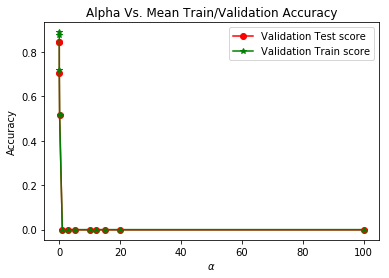

In [207]:
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

# KNN REGRESSOR

In [250]:
#import required packages
from sklearn import neighbors

In [214]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.75


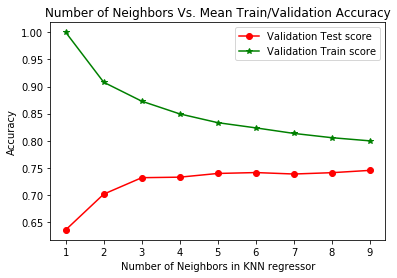

In [209]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

In [213]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train_org, y_train)
y_preds_knn = lasso.predict(X_test_org)
print('Train score on best parameters for KNN Regressor {}'.format(knn.score(X_train_org,y_train)))
print('Test score on best parameters for KNN Regressor {}'.format(knn.score(X_test_org,y_test)))
print(np.sqrt(mean_squared_error(y_test,y_preds_knn)) )

Train score on best parameters for KNN Regressor 0.80448345437256
Test score on best parameters for KNN Regressor 0.7545944253896838
0.14049649803556655


# Linear Regression

In [191]:
from sklearn.linear_model import LinearRegression

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

regressor.fit(X_train_org, y_train)
y_preds_LinReg = lasso.predict(X_test_org)
print('Train Score for Linear Regression model : {:.3f}'.format(regressor.score(X_train_org, y_train)))
print('Test Score for Linear Regression model : {:.3f}\n'.format(regressor.score(X_test_org, y_test)))

print('linear model coeff (w): {}\n'.format(regressor.coef_))
print('linear model intercept (b): {:.3f}\n'.format(regressor.intercept_))
print('R-squared score (training): {:.3f}\n'.format(regressor.score(X_train_org, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test_org, y_test)))
print(np.sqrt(mean_squared_error(y_test,y_preds_LinReg)) )

Train Score for Linear Regression model : 0.885
Test Score for Linear Regression model : 0.899

linear model coeff (w): [ 0.20355227 -0.08822713  0.04955803  0.17009576  0.03896517  0.0517539
 -0.04442524  0.03733364 -0.0710648   0.01792495 -0.07810069  0.02472053
 -0.02821695  0.00154956  0.05978768  0.01490102  0.02000558 -0.03807194
 -0.04086359 -0.02618247  0.00631509 -0.00537057  0.02270341 -0.02874904
  0.02357079 -0.05627597 -0.06082681  0.07569675  0.001756   -0.00347866
 -0.00268413 -0.02364038  0.01276913 -0.17742023 -0.06427993  0.0913752
 -0.11599452  0.01192407  0.05556133  0.00567369  0.12094984 -0.13373938
  0.0280188   0.02750018  0.03005035  0.13501896  0.09967289  0.04572908
 -0.0640907  -0.03349936  0.15607046 -0.07934177 -0.21321515  0.04391038
  0.01002111  0.11652802 -0.03246796 -0.04069513 -0.19691598 -0.06487504
  0.10145979  0.10757849 -0.0215445   0.06688793  0.01855282 -0.04759505
 -0.02854435  0.00079441 -0.04629788 -0.00898888  0.01659342 -0.06943706
 -0.04

# RIDGE

In [217]:
from  sklearn.linear_model import Ridge
param_grid = {'alpha':[0.001,0.01, 0.1, 1, 3, 5,10, 12,15,20, 100]}
grid_search = GridSearchCV(Ridge( random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 5}
Best cross-validation score: 0.85


In [218]:
ridge = Ridge(alpha=5)
ridge.fit(X_train_org, y_train)
y_preds_Ridge = lasso.predict(X_test_org)
print('Train score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_train_org,y_train)))
print('Test score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_test_org,y_test)))
print(np.sqrt(mean_squared_error(y_test,y_preds_Ridge)) )

Train score on best parameters for Ridge regressor 0.884
Test score on best parameters for Ridge regressor 0.896
0.14049649803556655


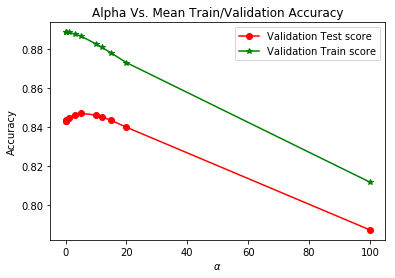

In [219]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

# LINEAR SVR

In [227]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.85


In [228]:
clf1 = LinearSVR(C=100).fit(X_train_org, y_train)
clf2 = SVR(kernel='linear', C=100).fit(X_train_org, y_train)
clf3 = SVR(kernel='rbf', gamma=.001, C=100).fit(X_train_org, y_train)
clf4 = SVR(kernel='poly', degree=3, C=100).fit(X_train_org, y_train)
print('Train score on best parameters for LinearSVR - {}'.format(clf1.score(X_train_org,y_train)))
print('Test score on best parameters ffor LinearSVR - {}'.format(clf1.score(X_test_org,y_test)))
print('Train score on best parameters for SVR kernel - Linear {}'.format(clf2.score(X_train_org,y_train)))
print('Test score on best parameters for SVR kernel - Linear {}'.format(clf2.score(X_test_org,y_test)))
print('Train score on best parameters for SVR kernel - rbf {}'.format(clf3.score(X_train_org,y_train)))
print('Test score on best parameters for SVR kernel - rbf {}'.format(clf3.score(X_test_org,y_test)))
print('Train score on best parameters for SVR kernel - poly {}'.format(clf4.score(X_train_org,y_train)))
print('Test score on best parameters for SVR kernel - poly {}'.format(clf4.score(X_test_org,y_test)))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score on best parameters for LinearSVR - 0.8026303182523709
Test score on best parameters ffor LinearSVR - 0.8420566121034544
Train score on best parameters for SVR kernel - Linear 0.8779024278465546
Test score on best parameters for SVR kernel - Linear 0.9062097347698927
Train score on best parameters for SVR kernel - rbf 0.8984648349350776
Test score on best parameters for SVR kernel - rbf 0.9082127371012652
Train score on best parameters for SVR kernel - poly 0.9140262221282578
Test score on best parameters for SVR kernel - poly 0.7795740010925402


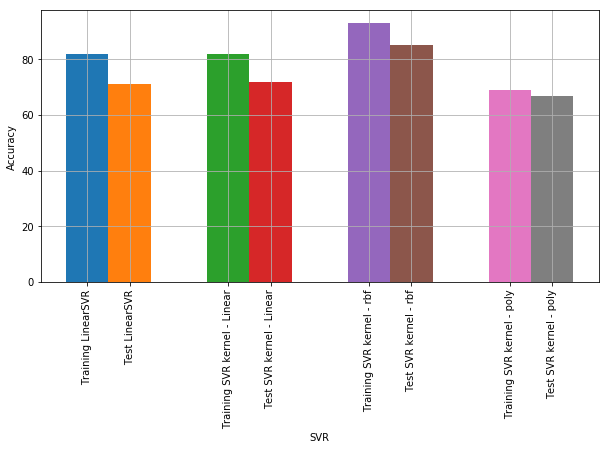

In [229]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.3
plt.xlabel('SVR')
plt.ylabel('Accuracy')
labels = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
labels1 = ['Training LinearSVR','Test LinearSVR','Training SVR kernel - Linear','Test SVR kernel - Linear','Training SVR kernel - rbf',
          'Test SVR kernel - rbf','Training SVR kernel - poly','Test SVR kernel - poly']
list_ticks = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_ticks)
for j in range(0,4,1) :
    ax.set_xticklabels(labels,rotation=90)
    ax.set_xticklabels(labels1,rotation=90)
accuracies_train=[82,82,93,69]
accuracies_test=[71,72,85,67]
for i in range(0,4,1) :
    ax.bar(i,accuracies_train[i],width)
    ax.bar(i+width,accuracies_test[i],width)
plt.grid()

# Polynomial Regression

In [275]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [230]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_reg_poly = poly.fit_transform(X_train_org)
    X_test_reg_poly = poly.transform(X_test_org)
    regressor.fit(X_train_reg_poly, y_train)
    train_score_list.append(regressor.score(X_train_reg_poly, y_train))
    test_score_list.append(regressor.score(X_test_reg_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.8852328723868498, 1.0, 1.0]
[0.8987307007835442, 0.7542905508295517, 0.8536923658533744]


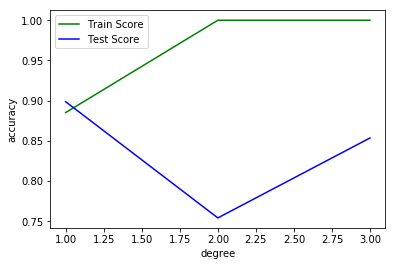

In [231]:
x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

# Decision Trees Regression

In [234]:
parameters = [{'max_depth':np.arange(1, 21), 'min_samples_leaf':[1, 5, 10, 20, 50, 100]}]

grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)

grid_search = grid_search.fit(X_train_org,y_train)

print("Grid search best score:", grid_search.best_score_)
print("Grid search best parameters:", grid_search.best_params_)

Grid search best score: -0.05765426433411427
Grid search best parameters: {'max_depth': 4, 'min_samples_leaf': 10}


In [236]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
dtr.fit(X_train_org,y_train)
y_preds_dtr = lasso.predict(X_test_org)
print('Train score on best parameters for Decision Tree regressor {:.3f}'.format(dtr.score(X_train_org,y_train)))
print('Test score on best parameters for Decision Tree regressor {:.3f}'.format(dtr.score(X_test_org,y_test)))
print(np.sqrt(mean_squared_error(y_test,y_preds_dtr)) )


Train score on best parameters for Decision Tree regressor 0.718
Test score on best parameters for Decision Tree regressor 0.598
0.14049649803556655


# DEEP LEARNING

In [412]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [413]:
def create_model():
    #create model
    model = Sequential()
    #INPUT LAYER 
    model.add(Dense(32, input_dim=101, kernel_initializer='he_uniform', activation='relu'))
    #Hidden Layer 1
    model.add(Dense(16,kernel_initializer='he_uniform', activation='relu'))
    # Hidden Layer 2
    model.add(Dense(8,kernel_initializer='he_uniform', activation='relu'))
    # Output Layer
    model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
    #compile model
    model.compile(loss='mse', optimizer='sgd',metrics=['accuracy'])
    return model

In [414]:
seed = 10
np.random.seed(10)

In [415]:
model = KerasRegressor(build_fn = create_model)
param_grid = {'batch_size':[10,20,30,40],'epochs':[10,20,30,40,50,60,70,80,90]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5,scoring='r2')

In [416]:
grid_search_result = grid_search.fit(X_train_org,y_train)

Epoch 1/10
934/934 [==============================] - 20s 21ms/step - loss: 11.5192 - acc: 0.0000e+00
Epoch 2/10
934/934 [==============================] - 1s 1ms/step - loss: 0.5465 - acc: 0.0000e+00
Epoch 3/10
934/934 [==============================] - 1s 1ms/step - loss: 0.2658 - acc: 0.0000e+00
Epoch 4/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1973 - acc: 0.0000e+00
Epoch 5/10
934/934 [==============================] - 1s 1ms/step - loss: 0.1578 - acc: 0.0000e+00
Epoch 6/10
934/934 [==============================] - 1s 1ms/step - loss: 0.0993 - acc: 0.0000e+00
Epoch 7/10
934/934 [==============================] - 1s 1ms/step - loss: 0.0868 - acc: 0.0000e+00
Epoch 8/10
934/934 [==============================] - 1s 1ms/step - loss: 0.0772 - acc: 0.0000e+00
Epoch 9/10
934/934 [==============================] - 1s 1ms/step - loss: 0.0608 - acc: 0.0000e+00
Epoch 10/10
934/934 [==============================] - 1s 1ms/step - loss: 0.0564 - acc: 0.0000e+00
Epoch 

934/934 [==============================] - 1s 1ms/step - loss: 0.0489 - acc: 0.0000e+00
Epoch 14/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0539 - acc: 0.0000e+00
Epoch 15/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0468 - acc: 0.0000e+00
Epoch 16/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0426 - acc: 0.0000e+00
Epoch 17/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0397 - acc: 0.0000e+00
Epoch 18/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0384 - acc: 0.0000e+00
Epoch 19/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0368 - acc: 0.0000e+00
Epoch 20/20
934/934 [==============================] - 1s 1ms/step - loss: 0.0438 - acc: 0.0000e+00
Epoch 1/20
934/934 [==============================] - 22s 24ms/step - loss: 9.7698 - acc: 0.0000e+00
Epoch 2/20
934/934 [==============================] - 2s 2ms/step - loss: 0.6857 - acc: 0.0000e+00
Epoch 3/20
9

935/935 [==============================] - ETA: 0s - loss: 0.1096 - acc: 0.0000e+0 - 1s 1ms/step - loss: 0.1087 - acc: 0.0000e+00
Epoch 8/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0877 - acc: 0.0000e+00
Epoch 9/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0945 - acc: 0.0000e+00
Epoch 10/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0720 - acc: 0.0000e+00
Epoch 11/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0638 - acc: 0.0000e+00
Epoch 12/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0625 - acc: 0.0000e+00
Epoch 13/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0517 - acc: 0.0000e+00
Epoch 14/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0444 - acc: 0.0000e+00
Epoch 15/30
935/935 [==============================] - 1s 1ms/step - loss: 0.0416 - acc: 0.0000e+00
Epoch 16/30
935/935 [==============================] - 1s 1ms/step - los

934/934 [==============================] - 1s 1ms/step - loss: 0.0349 - acc: 0.0000e+00
Epoch 29/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0310 - acc: 0.0000e+00
Epoch 30/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0240 - acc: 0.0000e+00
Epoch 31/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0252 - acc: 0.0000e+00
Epoch 32/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0290 - acc: 0.0000e+00
Epoch 33/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0245 - acc: 0.0000e+00
Epoch 34/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0247 - acc: 0.0000e+00
Epoch 35/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0237 - acc: 0.0000e+00
Epoch 36/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0233 - acc: 0.0000e+00
Epoch 37/40
934/934 [==============================] - 1s 1ms/step - loss: 0.0340 - acc: 0.0000e+00
Epoch 38/40


935/935 [==============================] - 1s 1ms/step - loss: 0.0284 - acc: 0.0000e+00
Epoch 32/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0265 - acc: 0.0000e+00
Epoch 33/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0307 - acc: 0.0000e+00
Epoch 34/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0264 - acc: 0.0000e+00
Epoch 35/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0261 - acc: 0.0000e+00
Epoch 36/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0314 - acc: 0.0000e+00
Epoch 37/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0268 - acc: 0.0000e+00
Epoch 38/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0271 - acc: 0.0000e+00
Epoch 39/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0288 - acc: 0.0000e+00
Epoch 40/40
935/935 [==============================] - 1s 1ms/step - loss: 0.0275 - acc: 0.0000e+00
Epoch 1/50
9

934/934 [==============================] - 1s 1ms/step - loss: 0.0302 - acc: 0.0000e+00
Epoch 24/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0295 - acc: 0.0000e+00
Epoch 25/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0316 - acc: 0.0000e+00
Epoch 26/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0303 - acc: 0.0000e+00
Epoch 27/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0333 - acc: 0.0000e+00
Epoch 28/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0316 - acc: 0.0000e+00
Epoch 29/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0312 - acc: 0.0000e+00
Epoch 30/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0299 - acc: 0.0000e+00
Epoch 31/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0258 - acc: 0.0000e+00
Epoch 32/50
934/934 [==============================] - 1s 1ms/step - loss: 0.0297 - acc: 0.0000e+00
Epoch 33/50


935/935 [==============================] - 1s 1ms/step - loss: 0.0223 - acc: 0.0000e+00
Epoch 37/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0218 - acc: 0.0000e+00
Epoch 38/50
935/935 [==============================] - 2s 2ms/step - loss: 0.0237 - acc: 0.0000e+00
Epoch 39/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0215 - acc: 0.0000e+00
Epoch 40/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0221 - acc: 0.0000e+00
Epoch 41/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0216 - acc: 0.0000e+00
Epoch 42/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0196 - acc: 0.0000e+00
Epoch 43/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0213 - acc: 0.0000e+00
Epoch 44/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0217 - acc: 0.0000e+00
Epoch 45/50
935/935 [==============================] - 1s 1ms/step - loss: 0.0235 - acc: 0.0000e+00
Epoch 46/50


934/934 [==============================] - 1s 1ms/step - loss: 0.0252 - acc: 0.0000e+00
Epoch 31/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0232 - acc: 0.0000e+00
Epoch 32/60
934/934 [==============================] - 2s 2ms/step - loss: 0.0303 - acc: 0.0000e+00
Epoch 33/60
934/934 [==============================] - 2s 2ms/step - loss: 0.0244 - acc: 0.0000e+00
Epoch 34/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0315 - acc: 0.0000e+00
Epoch 35/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0256 - acc: 0.0000e+00
Epoch 36/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0204 - acc: 0.0000e+00
Epoch 37/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0233 - acc: 0.0000e+00
Epoch 38/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0236 - acc: 0.0000e+00
Epoch 39/60
934/934 [==============================] - 1s 1ms/step - loss: 0.0224 - acc: 0.0000e+00
Epoch 40/60


934/934 [==============================] - 1s 1ms/step - loss: 0.0436 - acc: 0.0000e+00
Epoch 13/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0457 - acc: 0.0000e+00
Epoch 14/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0363 - acc: 0.0000e+00
Epoch 15/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0429 - acc: 0.0000e+00
Epoch 16/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0376 - acc: 0.0000e+00
Epoch 17/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0277 - acc: 0.0000e+00
Epoch 18/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0344 - acc: 0.0000e+00
Epoch 19/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0308 - acc: 0.0000e+00
Epoch 20/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0292 - acc: 0.0000e+00
Epoch 21/70
934/934 [==============================] - 2s 2ms/step - loss: 0.0281 - acc: 0.0000e+00
Epoch 22/70


934/934 [==============================] - 1s 2ms/step - loss: 0.0261 - acc: 0.0000e+00
Epoch 34/70
934/934 [==============================] - 1s 2ms/step - loss: 0.0233 - acc: 0.0000e+00
Epoch 35/70
934/934 [==============================] - 2s 2ms/step - loss: 0.0215 - acc: 0.0000e+00
Epoch 36/70
934/934 [==============================] - 2s 2ms/step - loss: 0.0244 - acc: 0.0000e+00
Epoch 37/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0185 - acc: 0.0000e+00
Epoch 38/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0249 - acc: 0.0000e+00
Epoch 39/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0193 - acc: 0.0000e+00
Epoch 40/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0184 - acc: 0.0000e+00
Epoch 41/70
934/934 [==============================] - 2s 2ms/step - loss: 0.0168 - acc: 0.0000e+00
Epoch 42/70
934/934 [==============================] - 1s 1ms/step - loss: 0.0204 - acc: 0.0000e+00
Epoch 43/70


935/935 [==============================] - 2s 2ms/step - loss: 0.0167 - acc: 0.0000e+00
Epoch 46/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0167 - acc: 0.0000e+00
Epoch 47/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0163 - acc: 0.0000e+00
Epoch 48/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0170 - acc: 0.0000e+00
Epoch 49/70
935/935 [==============================] - 1s 2ms/step - loss: 0.0169 - acc: 0.0000e+00
Epoch 50/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0167 - acc: 0.0000e+00
Epoch 51/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0136 - acc: 0.0000e+00
Epoch 52/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0153 - acc: 0.0000e+00
Epoch 53/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0137 - acc: 0.0000e+00
Epoch 54/70
935/935 [==============================] - 1s 1ms/step - loss: 0.0162 - acc: 0.0000e+00
Epoch 55/70


934/934 [==============================] - 2s 2ms/step - loss: 0.0150 - acc: 0.0000e+00
Epoch 68/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0138 - acc: 0.0000e+00
Epoch 69/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0134 - acc: 0.0000e+00
Epoch 70/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0120 - acc: 0.0000e+00
Epoch 71/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 72/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 73/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0134 - acc: 0.0000e+00
Epoch 74/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 75/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0126 - acc: 0.0000e+00
Epoch 76/80
934/934 [==============================] - 2s 2ms/step - loss: 0.0114 - acc: 0.0000e+00
Epoch 77/80


934/934 [==============================] - 1s 1ms/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 69/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 70/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 71/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 72/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0107 - acc: 0.0000e+00
Epoch 73/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 74/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 75/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 76/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 77/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0100 - acc: 0.0000e+00
Epoch 78/80


Epoch 70/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 71/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0106 - acc: 0.0000e+00
Epoch 72/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0128 - acc: 0.0000e+00
Epoch 73/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0126 - acc: 0.0000e+00
Epoch 74/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0119 - acc: 0.0000e+00
Epoch 75/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0108 - acc: 0.0000e+00
Epoch 76/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0103 - acc: 0.0000e+00
Epoch 77/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0099 - acc: 0.0000e+00
Epoch 78/80
934/934 [==============================] - 1s 2ms/step - loss: 0.0098 - acc: 0.0000e+00
Epoch 79/80
934/934 [==============================] - 1s 1ms/step - loss: 0.0098 - acc: 0.0000e+00


Epoch 72/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0149 - acc: 0.0000e+00
Epoch 73/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0165 - acc: 0.0000e+00
Epoch 74/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0175 - acc: 0.0000e+00
Epoch 75/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0134 - acc: 0.0000e+00
Epoch 76/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0153 - acc: 0.0000e+00
Epoch 77/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0156 - acc: 0.0000e+00
Epoch 78/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0144 - acc: 0.0000e+00
Epoch 79/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0175 - acc: 0.0000e+00
Epoch 80/80
935/935 [==============================] - 1s 2ms/step - loss: 0.0132 - acc: 0.0000e+00
Epoch 1/80
935/935 [==============================] - 26s 28ms/step - loss: 8.3643 - acc: 0.0000e+00

934/934 [==============================] - 1s 2ms/step - loss: 0.0126 - acc: 0.0000e+00
Epoch 76/90
934/934 [==============================] - 1s 1ms/step - loss: 0.0158 - acc: 0.0000e+00
Epoch 77/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0133 - acc: 0.0000e+00
Epoch 78/90
934/934 [==============================] - 2s 2ms/step - loss: 0.0124 - acc: 0.0000e+00
Epoch 79/90
934/934 [==============================] - 2s 2ms/step - loss: 0.0114 - acc: 0.0000e+00
Epoch 80/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0121 - acc: 0.0000e+00
Epoch 81/90
934/934 [==============================] - 1s 1ms/step - loss: 0.0103 - acc: 0.0000e+00
Epoch 82/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0113 - acc: 0.0000e+00
Epoch 83/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0125 - acc: 0.0000e+00
Epoch 84/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0108 - acc: 0.0000e+00
Epoch 85/90


934/934 [==============================] - 1s 2ms/step - loss: 0.0168 - acc: 0.0000e+00
Epoch 58/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0156 - acc: 0.0000e+00
Epoch 59/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0178 - acc: 0.0000e+00
Epoch 60/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0174 - acc: 0.0000e+00
Epoch 61/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0185 - acc: 0.0000e+00
Epoch 62/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0156 - acc: 0.0000e+00
Epoch 63/90
934/934 [==============================] - 2s 2ms/step - loss: 0.0162 - acc: 0.0000e+00
Epoch 64/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0156 - acc: 0.0000e+00
Epoch 65/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0179 - acc: 0.0000e+00
Epoch 66/90
934/934 [==============================] - 1s 2ms/step - loss: 0.0159 - acc: 0.0000e+00
Epoch 67/90


935/935 [==============================] - 2s 2ms/step - loss: 0.0207 - acc: 0.0000e+00
Epoch 50/90
935/935 [==============================] - 2s 2ms/step - loss: 0.0174 - acc: 0.0000e+00
Epoch 51/90
935/935 [==============================] - 2s 2ms/step - loss: 0.0207 - acc: 0.0000e+00
Epoch 52/90
935/935 [==============================] - 1s 2ms/step - loss: 0.0178 - acc: 0.0000e+00
Epoch 53/90
935/935 [==============================] - 2s 2ms/step - loss: 0.0199 - acc: 0.0000e+00
Epoch 54/90
935/935 [==============================] - 2s 2ms/step - loss: 0.0206 - acc: 0.0000e+00
Epoch 55/90
935/935 [==============================] - 1s 2ms/step - loss: 0.0195 - acc: 0.0000e+00
Epoch 56/90
935/935 [==============================] - 2s 2ms/step - loss: 0.0193 - acc: 0.0000e+00
Epoch 57/90
935/935 [==============================] - 2s 2ms/step - loss: 0.0166 - acc: 0.0000e+00
Epoch 58/90
935/935 [==============================] - 2s 3ms/step - loss: 0.0223 - acc: 0.0000e+00
Epoch 59/90


935/935 [==============================] - 1s 1ms/step - loss: 0.0213 - acc: 0.0000e+00
Epoch 42/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0232 - acc: 0.0000e+00
Epoch 43/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0275 - acc: 0.0000e+00
Epoch 44/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0225 - acc: 0.0000e+00
Epoch 45/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0232 - acc: 0.0000e+00
Epoch 46/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0209 - acc: 0.0000e+00
Epoch 47/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0195 - acc: 0.0000e+00
Epoch 48/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0207 - acc: 0.0000e+00
Epoch 49/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0216 - acc: 0.0000e+00
Epoch 50/90
935/935 [==============================] - 1s 1ms/step - loss: 0.0195 - acc: 0.0000e+00
Epoch 51/90


935/935 [==============================] - 1s 594us/step - loss: 1.2262 - acc: 0.0000e+00
Epoch 3/20
935/935 [==============================] - 1s 589us/step - loss: 0.5272 - acc: 0.0000e+00
Epoch 4/20
935/935 [==============================] - 1s 589us/step - loss: 0.4944 - acc: 0.0000e+00
Epoch 5/20
935/935 [==============================] - 1s 585us/step - loss: 0.2191 - acc: 0.0000e+00
Epoch 6/20
935/935 [==============================] - 1s 589us/step - loss: 0.1951 - acc: 0.0000e+00
Epoch 7/20
935/935 [==============================] - 1s 584us/step - loss: 0.1570 - acc: 0.0000e+00
Epoch 8/20
935/935 [==============================] - 1s 592us/step - loss: 0.2335 - acc: 0.0000e+00
Epoch 9/20
935/935 [==============================] - 1s 589us/step - loss: 0.1243 - acc: 0.0000e+00
Epoch 10/20
935/935 [==============================] - 1s 587us/step - loss: 0.0879 - acc: 0.0000e+00
Epoch 11/20
935/935 [==============================] - 1s 592us/step - loss: 0.0940 - acc: 0.0000e+00

935/935 [==============================] - 1s 590us/step - loss: 2.2537 - acc: 0.0000e+00
Epoch 3/30
935/935 [==============================] - 1s 593us/step - loss: 0.7556 - acc: 0.0000e+00
Epoch 4/30
935/935 [==============================] - 1s 588us/step - loss: 0.2648 - acc: 0.0000e+00
Epoch 5/30
935/935 [==============================] - 1s 592us/step - loss: 0.2448 - acc: 0.0000e+00
Epoch 6/30
935/935 [==============================] - 1s 591us/step - loss: 0.1661 - acc: 0.0000e+00
Epoch 7/30
935/935 [==============================] - 1s 600us/step - loss: 0.1559 - acc: 0.0000e+00
Epoch 8/30
935/935 [==============================] - 1s 593us/step - loss: 0.1527 - acc: 0.0000e+00
Epoch 9/30
935/935 [==============================] - 1s 590us/step - loss: 0.1215 - acc: 0.0000e+00
Epoch 10/30
935/935 [==============================] - 1s 592us/step - loss: 0.1438 - acc: 0.0000e+00
Epoch 11/30
935/935 [==============================] - 1s 592us/step - loss: 0.1522 - acc: 0.0000e+00

935/935 [==============================] - 1s 603us/step - loss: 0.1016 - acc: 0.0000e+00
Epoch 13/40
935/935 [==============================] - 1s 595us/step - loss: 0.0757 - acc: 0.0000e+00
Epoch 14/40
935/935 [==============================] - 1s 600us/step - loss: 0.0634 - acc: 0.0000e+00
Epoch 15/40
935/935 [==============================] - 1s 599us/step - loss: 0.0607 - acc: 0.0000e+00
Epoch 16/40
935/935 [==============================] - 1s 603us/step - loss: 0.0604 - acc: 0.0000e+00
Epoch 17/40
935/935 [==============================] - 1s 599us/step - loss: 0.0602 - acc: 0.0000e+00
Epoch 18/40
935/935 [==============================] - 1s 598us/step - loss: 0.0586 - acc: 0.0000e+00
Epoch 19/40
935/935 [==============================] - 1s 616us/step - loss: 0.0442 - acc: 0.0000e+00
Epoch 20/40
935/935 [==============================] - 1s 597us/step - loss: 0.0469 - acc: 0.0000e+00
Epoch 21/40
935/935 [==============================] - 1s 597us/step - loss: 0.0413 - acc: 0.0

934/934 [==============================] - 1s 596us/step - loss: 0.0267 - acc: 0.0000e+00
Epoch 43/50
934/934 [==============================] - 1s 597us/step - loss: 0.0254 - acc: 0.0000e+00
Epoch 44/50
934/934 [==============================] - 1s 621us/step - loss: 0.0315 - acc: 0.0000e+00
Epoch 45/50
934/934 [==============================] - 1s 595us/step - loss: 0.0254 - acc: 0.0000e+00
Epoch 46/50
934/934 [==============================] - 1s 594us/step - loss: 0.0220 - acc: 0.0000e+00
Epoch 47/50
934/934 [==============================] - 1s 596us/step - loss: 0.0227 - acc: 0.0000e+00
Epoch 48/50
934/934 [==============================] - 1s 607us/step - loss: 0.0260 - acc: 0.0000e+00
Epoch 49/50
934/934 [==============================] - 1s 599us/step - loss: 0.0253 - acc: 0.0000e+00
Epoch 50/50
934/934 [==============================] - 1s 597us/step - loss: 0.0243 - acc: 0.0000e+00
Epoch 1/50
934/934 [==============================] - 22s 23ms/step - loss: 15.6222 - acc: 0.0

KeyboardInterrupt: 

In [395]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'epochs': 10}
Best cross-validation score: -15.57


In [417]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=101, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(16,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))

In [418]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [428]:
model.fit(X_train_org, y_train, epochs = 70, batch_size = 40)

Epoch 1/70
1168/1168 [==============================] - 1s 561us/step - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 2/70
1168/1168 [==============================] - 1s 497us/step - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 3/70
1168/1168 [==============================] - 1s 651us/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 4/70
1168/1168 [==============================] - 1s 616us/step - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 5/70
1168/1168 [==============================] - 1s 610us/step - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 6/70
1168/1168 [==============================] - 1s 617us/step - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 7/70
1168/1168 [==============================] - 1s 585us/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 8/70
1168/1168 [==============================] - 1s 541us/step - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 9/70
1168/1168 [==============================] - 1s 551us/step - loss: 0.0224 - m

In [429]:
model.evaluate(X_test_org, y_test)

292/292 [==============================] - 0s 530us/step


[0.04000041031674163, 0.04000041031674163]

In [430]:
from sklearn.metrics import r2_score, recall_score, mean_squared_error

y_train_predict = model.predict(X_train_org)
y_test_predict = model.predict(X_test_org)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.90
Test score: 0.76


# Comparison TABLE

In [262]:
# Index Levels
outside = ['Before PCA','Before PCA','After PCA','After PCA']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [263]:
data_1 = np.array([(0.8145,0.9469,0.9211,0.9072,-0.5321,0.9128,1,0.897,'NA','NA'),
                     (0.7508,-3.2427,0.8759,0.8795,-0.7478,0.8783,0.836,0.786,'NA','NA'),
                     (0.804,0.885,0.884,0.875,0.802,0.877,1,0.718,0.898,0.914),
                     (0.754,0.899,0.896,0.883,0.842,0.906,0.853,0.598,0.908,0.779)])

In [264]:
df = pd.DataFrame(data_1,index=hier_index,columns=['KNN','Linear','Ridge','Lasso','LinearSVR','SVR kernel - Linear','Polynomial Regression','Decision Trees Regression','SVR kernel - rbf','SVR kernel - poly'])


In [265]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='YlOrRd')
s

# Comparison Table From Project 1(Without PCA)

In [386]:
reporting_df

,Regressor,Avg Train Score,Avg Test Score,Avg RMSE,Best Hyperparameters
1,KNN,0.814507,0.750801,0.123953,{'n_neighbors': 7}
2,Ridge,0.921121,0.875983,0.123953,{'alpha': 5}
3,Polynomial Regression,1,0.836433,0.123953,"{'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 2}"
4,DecisionTree,0.897038,0.786022,0.123953,"{'max_depth': 11, 'min_samples_leaf': 10}"
5,Linear Regression,0.946989,-3.242791,0.123953,Linear Regression(NA)
6,Linear SVR,-0.532104,-0.747893,0.495812,{'C': 1}
7,Kernalized SVR,0.912854,0.878307,0.474963,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}"
8,Lasso,0.90728,0.879578,0.474963,{'alpha': 0.0008}


# We can see that Avg Training Score and Testing Score for Lasso give best results and also RMSE values for both are same.
# Even though we get higher avg training score in Kernalized SVR  than Lasso but we can see we get better results for avg test score from Lasso.

# Our best Model is Lasso and Best Alpha value is 0.0008

# We will see our predicted values for Kernalized SVR as we can see from above dataframe that Kernalised SVR works best for us.

In [387]:
print(y_preds_las)

[12.1792912  13.19379392 11.9179617  12.03804744 12.0122655  12.26772053
 12.27751622 12.65540531 11.76593868 11.68126942 11.83153162 11.42866541
 12.37530532 12.48337657 13.24336521 11.8929478  12.18469567 11.74771426
 11.58875222 12.43586018 12.14243702 12.16980313 12.04429363 12.06353061
 11.70001517 11.93744132 11.89792985 12.03177884 12.35636683 11.8692405
 12.08937946 11.82896228 11.48509897 12.17044825 11.76220365 12.18936175
 11.89431402 12.4796449  11.54703354 12.25438648 11.87028648 12.60376004
 12.16119738 12.25610287 11.45757532 11.78507821 11.72040191 11.64742166
 11.82692077 12.35640281 11.17502156 11.41498163 11.56258145 11.7349834
 11.95355583 11.80436532 12.21535238 11.85706776 12.34654751 11.9183749
 12.71130157 11.78903106 12.21992976 11.80655582 11.619131   11.76398327
 11.50280324 11.79445669 12.08954479 12.28930932 11.8383479  12.3320679
 12.26639055 12.46991092 12.08542717 12.96784896 12.23438953 12.17515111
 12.21719346 11.90123534 11.80319473 11.70274858 12.463

# Now we will have to take the antilog for our predicted values as we log transformed the values to get a normal distribution.

## Now to get our predicted prices we take antilog for predictions.

In [388]:
predictions_Lasso = np.exp(y_preds_las)

In [389]:
print(predictions_ksvr)

[ 184519.6229702   529661.51660475  151584.67714092  162609.99627371
  164219.17494389  217119.61159469  211778.72848329  300248.21400616
  125788.34526252  118737.56922596  141053.84261055   83968.37166622
  226489.26365409  269978.5697892   530095.6180529   139742.47933606
  199207.81381594  128419.5516713    99772.38575687  240925.33451273
  185403.15910073  186787.12525249  189989.56872367  169474.95317245
  124962.15366535  157855.58415399  149289.47392093  169989.81013372
  224091.56955731  144709.10961303  178717.24893027  135679.99040887
   98952.29164665  189106.90713087  132051.56346926  194674.5106357
  147066.15640038  238913.24575106  116249.2607734   210566.03137031
  130710.31717882  306184.31086405  199841.49192912  217954.05776754
   91729.93429509  130182.62908314  127321.79333554  113142.29323174
  117611.94048601  231050.87575512   66815.94574808   87358.64624658
  100135.97703434  123023.06436475  156500.13014048  129405.68107015
  197894.5566172   136693.84827474 

# Applied Machine Learning Project (Classification)

### Problem Statement: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### **Dataset Information**: The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed to ('yes') or not ('no'). It comprises of the following attribute types:
#### * Client Data
#### * Data Related to the Last Contact of the Client
#### * Social and Economic Attributes
#### * Misc Information

Source: Kaggle/UCI Repository

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(123)

## Reading our Data File:

In [3]:
bank_marketing = pd.read_csv('bank-marketing_updated.csv')
bank_marketing.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Exploratory Data Analysis:


In [4]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 21 columns):
age               5159 non-null int64
job               5109 non-null object
marital           5144 non-null object
education         4953 non-null object
default           4085 non-null object
housing           5036 non-null object
loan              5036 non-null object
contact           5159 non-null object
month             5159 non-null object
day_of_week       5159 non-null object
duration          5159 non-null int64
campaign          5159 non-null int64
pdays             5159 non-null int64
previous          5159 non-null int64
poutcome          5159 non-null object
emp.var.rate      5159 non-null float64
cons.price.idx    5159 non-null float64
cons.conf.idx     5159 non-null float64
euribor3m         5159 non-null float64
nr.employed       5159 non-null float64
y                 5159 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 846.5+ KB


In [5]:
for col in bank_marketing.describe(include = 'O').columns:
  print("Unique Values in Column - {} => {}".format(col, bank_marketing[col].unique()))

Unique Values in Column - job => ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 nan]
Unique Values in Column - marital => ['married' 'single' 'divorced' nan]
Unique Values in Column - education => ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' nan 'illiterate']
Unique Values in Column - default => ['no' nan 'yes']
Unique Values in Column - housing => ['yes' 'no' nan]
Unique Values in Column - loan => ['no' nan 'yes']
Unique Values in Column - contact => ['cellular' 'telephone']
Unique Values in Column - month => ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
Unique Values in Column - day_of_week => ['fri' 'wed' 'mon' 'thu' 'tue']
Unique Values in Column - poutcome => ['nonexistent' 'failure' 'success']
Unique Values in Column - y => ['no' 'yes']


As can be seen above, there are around 11 attributes present in the dataset that have string values to them, this are mostly classified as categorical. However, with closer inspection, we can see that the **"Education"** attribute here can be an Ordinal variable since the number of years of education do have a ranking associated with it.

##### Exploring the Dependable Variable or the Variable to Predict:

In [6]:
bank_marketing['y'].describe()

count     5159
unique       2
top         no
freq      3668
Name: y, dtype: object

##### *Exploring the Null Values in Each Column*:

In [7]:
bank_marketing.isnull().sum()

age                  0
job                 50
marital             15
education          206
default           1074
housing            123
loan               123
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
print("Total Missing Values Percentage: {0:10.2f}%".format(bank_marketing.isnull().sum().sum()/bank_marketing.size*100))

Total Missing Values Percentage:       1.47%


### Visualizing the Data Variables:


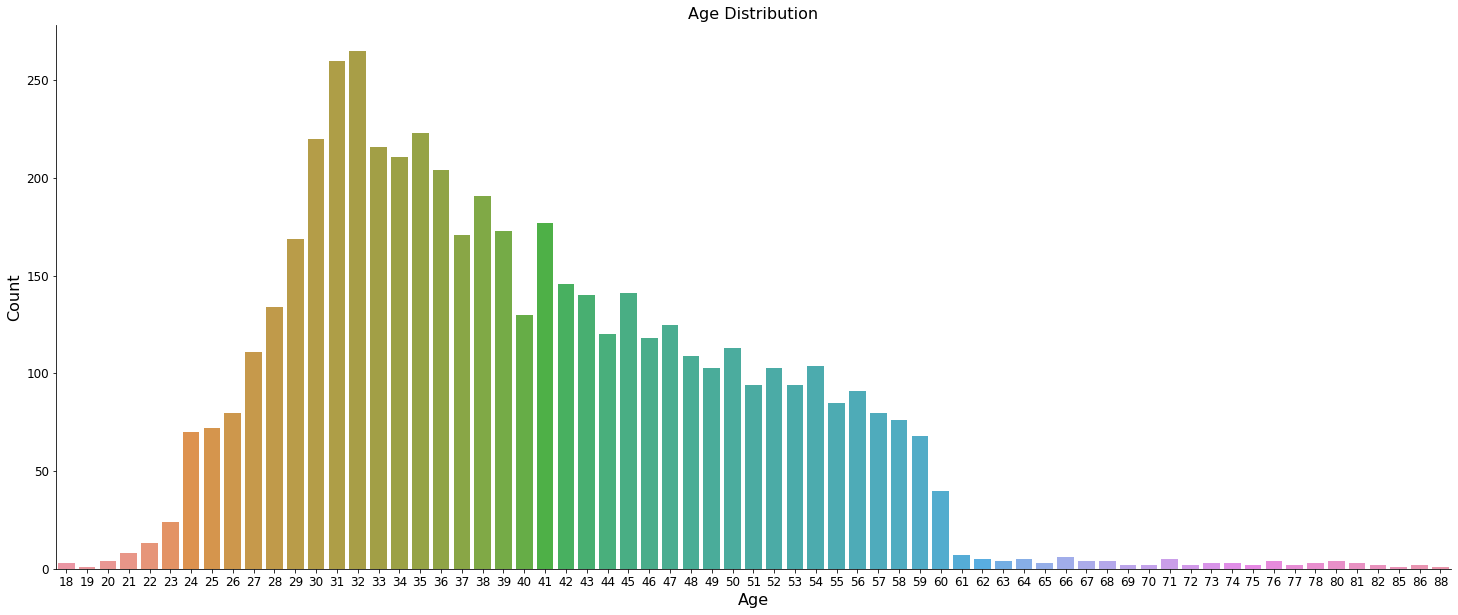

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'age', data = bank_marketing)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Age Distribution', fontsize=16)
ax.tick_params(labelsize=12)
sns.despine()
plt.show()

The age distribution seems to be a right (or positively) skewed distribution. We could have initially gone for equal class width, but it seems like splitting this data in quartiles and then having a ranked value for each quartile seems like a good way forward. This is done further down the code.

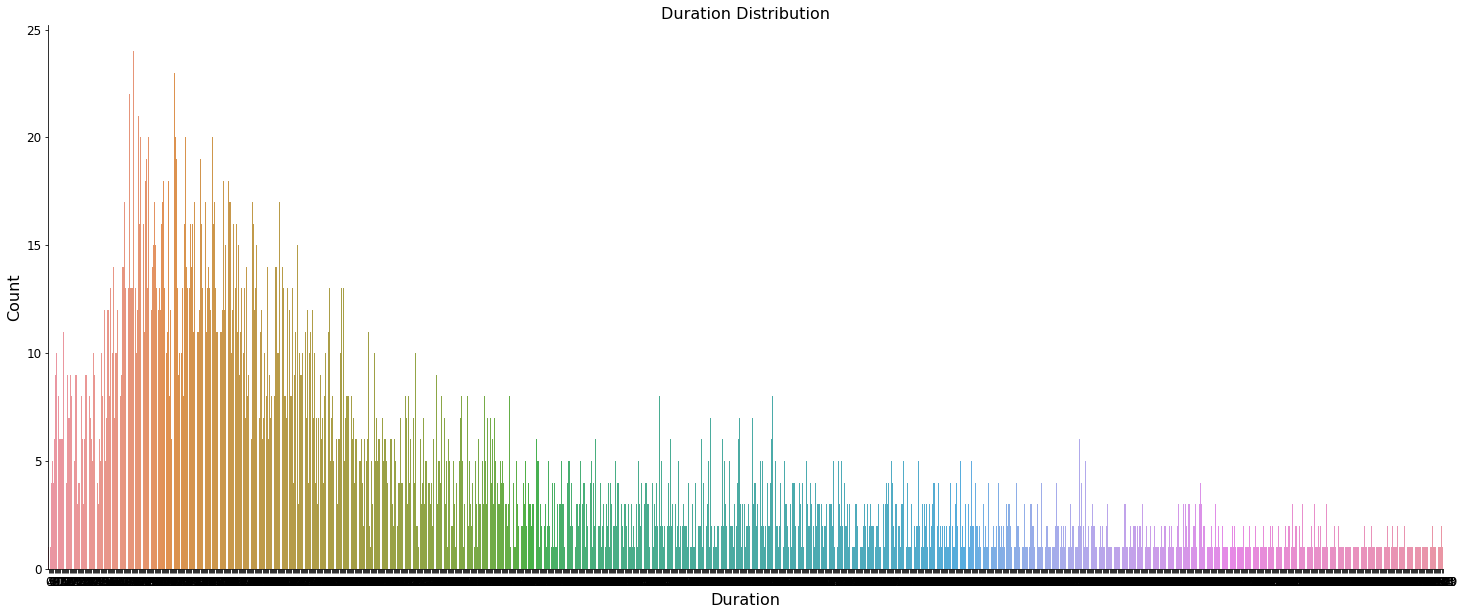

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'duration', data = bank_marketing)
ax.set_xlabel('Duration', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Duration Distribution', fontsize=16)
ax.tick_params(labelsize=12)
sns.despine()
plt.show()

This was done solely to look at how skewed the distribution values are. There is a right skew here as well, but there aren't as less outliers in this dataset than that of age. We will thus, scale this later before fitting it to our model.

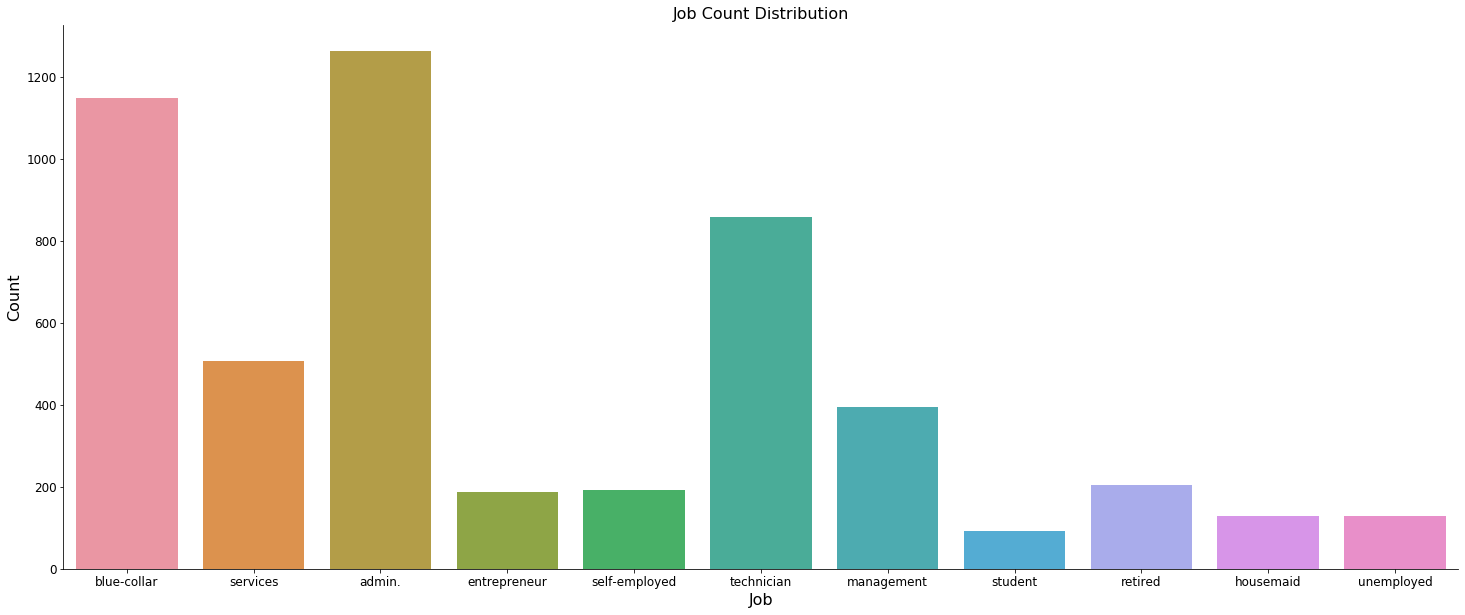

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'job', data = bank_marketing)
ax.set_xlabel('Job', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Job Count Distribution', fontsize=16)
ax.tick_params(labelsize=12)
sns.despine()
plt.show()

This was done to show the frequency distribution of the different job types that are present. There was no insight to gain from this (which was not the purpose) but just to explore this variable.

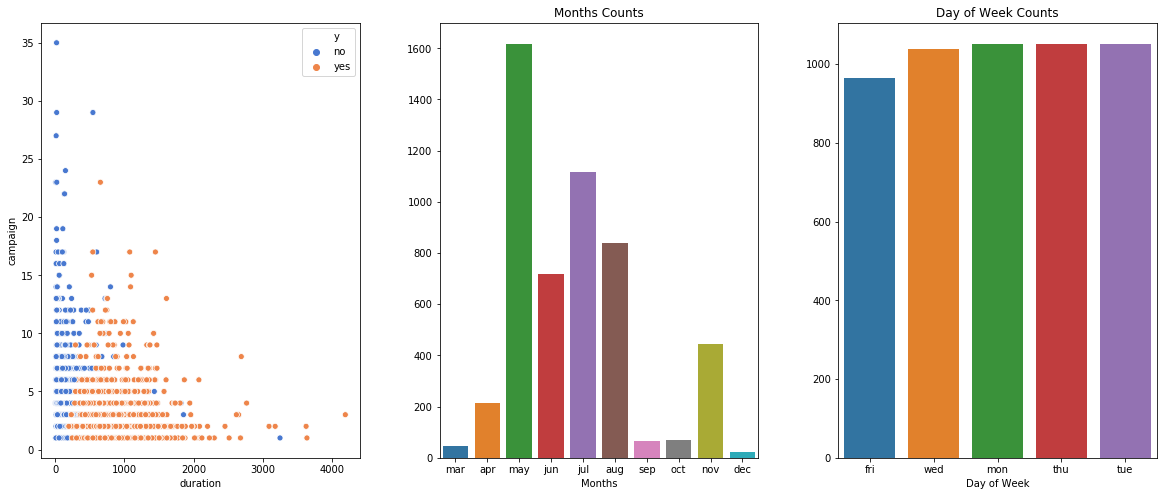

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

sns.scatterplot(x ='duration', y = 'campaign', hue = 'y',palette = 'muted', ax=ax1, data=bank_marketing)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Campaign', fontsize=16)
ax.set_title('Age vs Campaign Based on Final Decision', fontsize=16)

sns.countplot(bank_marketing['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_marketing['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

* The first chart tells us that a majority of the subscriptions to a term deposit are when the duration of the call that took place is of a greater value (in seconds). This seems like a fairly intuitive guess and we will be **skipping** over this variable in our final model. This variable could easily be added in the model to get a much higher accuracy, but that wouldn't be a real-world scenario, since the duration of a call is found out AFTER a decision is made.
* The second chart shows the frequency of the months. 5 out of the 12 months have a much higher volume of data points and this, we need to explore the relationship of this variable more after cleaning and scaling the remaining variables. We will **keep** this for now.
* The third chart shows us the distribution of the weekdays when the call took place. As can be seen, it is very much evenly distributed and thus, we will be **skipping** over this attribute in our final model.

### A Few More Charts for Exploratory Analysis:


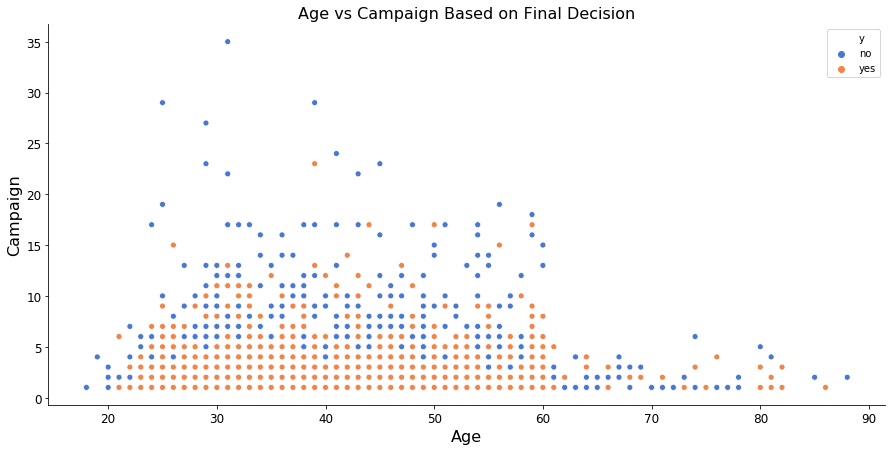

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.scatterplot(x ='age', y = 'campaign', hue = 'y',palette = 'muted', data=bank_marketing)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Campaign', fontsize=16)
ax.set_title('Age vs Campaign Based on Final Decision', fontsize=16)
ax.tick_params(labelsize=12)
sns.despine()
plt.show()

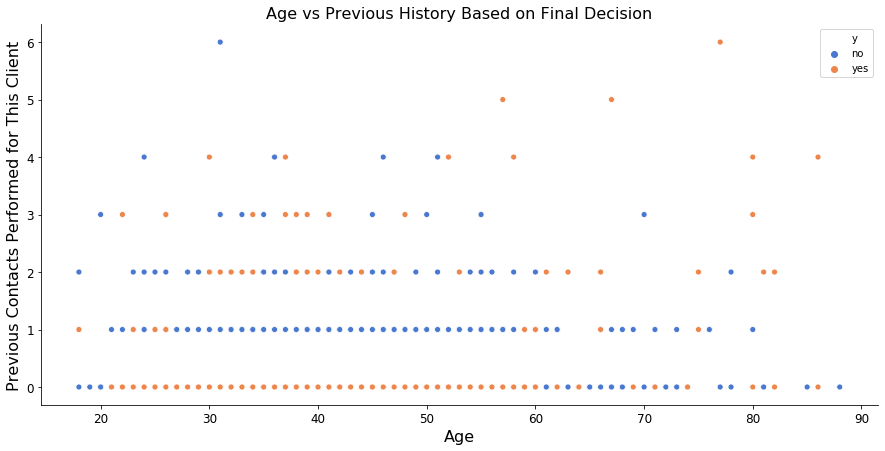

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.scatterplot(x ='age', y = 'previous', hue = 'y',palette = 'muted', data=bank_marketing)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Previous Contacts Performed for This Client', fontsize=16)
ax.set_title('Age vs Previous History Based on Final Decision', fontsize=16)
ax.tick_params(labelsize=12)
sns.despine()
plt.show()

Text(0, 0.5, 'Subscription Frequency')

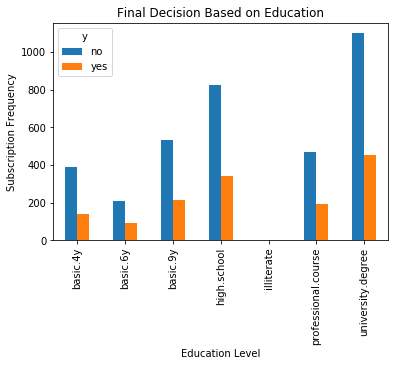

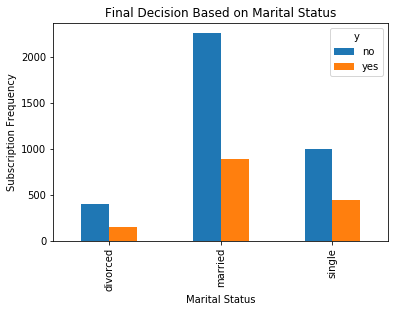

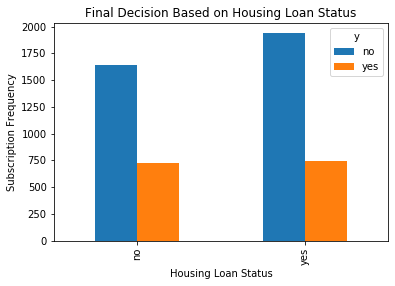

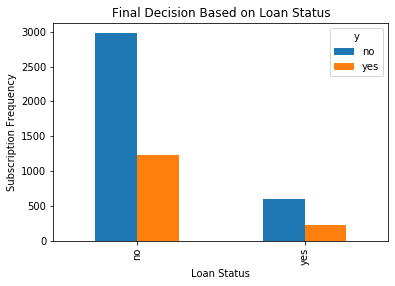

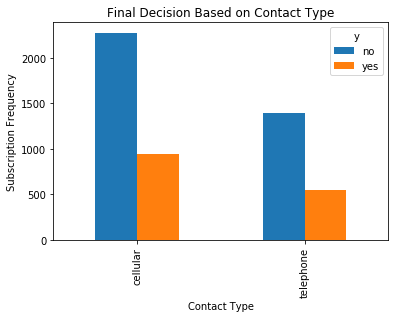

In [15]:
pd.crosstab(bank_marketing.education, bank_marketing.y).plot(kind='bar')
plt.title('Final Decision Based on Education')
plt.xlabel('Education Level')
plt.ylabel('Subscription Frequency')

pd.crosstab(bank_marketing.marital, bank_marketing.y).plot(kind='bar')
plt.title('Final Decision Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Frequency')

pd.crosstab(bank_marketing.housing, bank_marketing.y).plot(kind='bar')
plt.title('Final Decision Based on Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Subscription Frequency')

pd.crosstab(bank_marketing.loan, bank_marketing.y).plot(kind='bar')
plt.title('Final Decision Based on Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Subscription Frequency')

pd.crosstab(bank_marketing.contact, bank_marketing.y).plot(kind='bar')
plt.title('Final Decision Based on Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Subscription Frequency')

In [16]:
correlation_matrix = bank_marketing.corr()
correlation_matrix.style.background_gradient("viridis")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,0.00215246,-0.00595909,-0.0417399,0.0499515,-0.0264985,-0.012697,0.0992506,-0.0218936,-0.0468206
duration,0.00215246,1,-0.0223776,0.0319417,-0.0877299,0.204572,0.19112,0.0220801,0.19342,0.174094
campaign,-0.00595909,-0.0223776,1,0.0555108,-0.0862471,0.160702,0.134917,-0.00386399,0.146201,0.149668
pdays,-0.0417399,0.0319417,0.0555108,1,-0.592416,0.283906,0.0776757,-0.0808193,0.313191,0.387649
previous,0.0499515,-0.0877299,-0.0862471,-0.592416,1,-0.438366,-0.192348,-0.0583814,-0.479243,-0.529122
emp.var.rate,-0.0264985,0.204572,0.160702,0.283906,-0.438366,1,0.748556,0.188579,0.973036,0.905971
cons.price.idx,-0.012697,0.19112,0.134917,0.0776757,-0.192348,0.748556,1,0.0171849,0.662281,0.494059
cons.conf.idx,0.0992506,0.0220801,-0.00386399,-0.0808193,-0.0583814,0.188579,0.0171849,1,0.267203,0.0968134
euribor3m,-0.0218936,0.19342,0.146201,0.313191,-0.479243,0.973036,0.662281,0.267203,1,0.944382
nr.employed,-0.0468206,0.174094,0.149668,0.387649,-0.529122,0.905971,0.494059,0.0968134,0.944382,1


The most important observation from the correlation matrix is that 4 of the Socio-Economic variables are highly correlated with each other. These are employment variation rate, consumer price index, euribor (daily interest) 3 month rate, and number of employees. We will use this insight to **skip** at least 3 of these variables from the final model.

## Data Cleaning Process:

##### Replacing the NA Values with the Mode of that Column:


In [17]:
bank_marketing = bank_marketing.fillna(bank_marketing.mode().iloc[0])
bank_marketing.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Converting Age into Quartiles and Assigning Values to Age Groups (1-4) Based on Their Quartile:

In [18]:
age_q1 = bank_marketing['age'].quantile(q = 0.25)
print('1st Quartile: ', age_q1)

age_q2 = bank_marketing['age'].quantile(q = 0.5)
print('2nd Quartile: ', age_q2)

age_q3 = bank_marketing['age'].quantile(q = 0.75)
print('3rd Quartile: ', age_q3)

def age(dataframe):
    dataframe.loc[dataframe['age'] <= age_q1, 'age'] = 1
    dataframe.loc[(dataframe['age'] > age_q1) & (dataframe['age'] <= age_q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] > age_q2) & (dataframe['age'] <= age_q3), 'age'] = 3
    dataframe.loc[dataframe['age'] >= age_q3, 'age'] = 4
           
    return dataframe

age(bank_marketing);

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0


##### Checking the Distinct Values in Education and then Ranking them Based on Manual Order:

In [19]:
bank_marketing['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)

In [20]:
ranking = {"education": {"illiterate": 0, "basic.4y": 1, "basic.6y": 2, "basic.9y": 3, 
                      "high.school": 4, "university.degree":5, "professional.course":6}}
bank_marketing.replace(ranking, inplace=True)

##### Using Label Encoder, for POutcome, Assign 3 Labels:

In [21]:
le = LabelEncoder()
bank_marketing['poutcome']     = le.fit_transform(bank_marketing['poutcome']) 

##### One Hot Encode all the Remaining Categorical Variables where the Order does not Matter:

In [22]:
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['job'] , prefix = ['job'] , drop_first = True)
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['marital'] , prefix = ['marital'] , drop_first = True)
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['default'] , prefix = ['default'] , drop_first = True)
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['housing'] , prefix = ['housing'] , drop_first = True)
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['contact'] , prefix = ['contact'] , drop_first = True)
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['loan'] , prefix = ['loan'] , drop_first = True)
bank_marketing = pd.get_dummies(data = bank_marketing, columns = ['month'] , prefix = ['month'] , drop_first = True)

##### Check the Final Cleaned Dataset:

In [23]:
bank_marketing.isnull().sum()

age                  0
education            0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
contact_telephone    0
loan_yes             0
month_aug            0
month_dec            0
month_jul            0
month_jun            0
month_mar            0
month_may            0
month_nov            0
month_oct            0
month_sep            0
dtype: int64

In [24]:
bank_marketing.head()

,age,education,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,3,fri,487,2,999,0,1,-1.8,92.893,...,0,0,0,0,0,0,1,0,0,0
1,3,4,fri,346,4,999,0,1,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
2,1,4,wed,227,1,999,0,1,1.4,94.465,...,0,0,0,0,1,0,0,0,0,0
3,2,3,fri,17,3,999,0,1,1.4,94.465,...,0,0,0,0,1,0,0,0,0,0
4,3,5,mon,58,1,999,0,1,-0.1,93.200,...,0,0,0,0,0,0,0,1,0,0


In [25]:
correlation_matrix = bank_marketing.corr()
correlation_matrix.style.background_gradient("viridis")

In [26]:
bank_final = bank_marketing.drop(columns = ['emp.var.rate', 'euribor3m', 'nr.employed','day_of_week', 'duration'])

In [27]:
bank_final.head()

,age,education,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,job_blue-collar,...,loan_yes,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1,3,2,999,0,1,92.893,-46.2,no,1,...,0,0,0,0,0,0,1,0,0,0
1,3,4,4,999,0,1,93.994,-36.4,no,0,...,0,0,0,0,0,0,1,0,0,0
2,1,4,1,999,0,1,94.465,-41.8,no,0,...,0,0,0,0,1,0,0,0,0,0
3,2,3,3,999,0,1,94.465,-41.8,no,0,...,0,0,0,0,1,0,0,0,0,0
4,3,5,1,999,0,1,93.200,-42.0,no,0,...,0,0,0,0,0,0,0,1,0,0


## Scale the Numbers

##### The 2 Types of Scalers that we can use (and tried using) are:
* **Standard Scaler** removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. It therefore cannot guarantee balanced feature scales in the presence of outliers
* **MinMaxScaler** rescales the data set such that all feature values are in the range [0, 1]. However, this scaling compresses all inliers in the narrow range [0, 0.005] for the transformed number of households.

Since our data comprises of outliers, we are using MinMax Scaler

In [28]:
MM_scaler = StandardScaler()

##### Create Train and Test Sets


In [29]:
X = bank_final.drop(['y'],axis=1)
y = pd.get_dummies(bank_final['y'], columns = ['y'], prefix = ['y'], drop_first = True)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

##### Start Applying the MinMax Scaler


In [30]:
MM_X_train = MM_scaler.fit_transform(X_train_org)
MM_X_test = MM_scaler.transform(X_test_org)

## Model Evaluation:
In order to evaluate which model will be the best to correctly predict the final classification of our dataset, we are using the **Area Under the** **ROC Curve**, also known as ROC AUC score. This score indicates how well the probabilities from the positive classes are separated from the negative classes. The advantage of this score is clearly shown when the data is not completely balanced. In our case, 71% of the final classification is "No", while the remaining 29% is "Yes". This this scoring will help us evaluate the models discarding this imbalance.
We will also be using a **confusion matrix** to check the accuracy.

## Method 1: KNN Classification on MM_Scaler

In [31]:
from sklearn.neighbors import KNeighborsClassifier

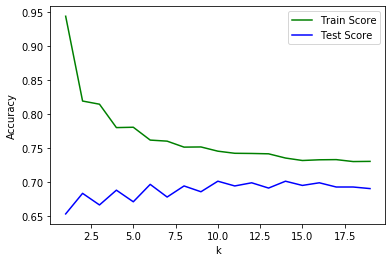

In [32]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(MM_X_train, y_train)
    train_score_array.append(knn.score(MM_X_train, y_train))
    test_score_array.append(knn.score(MM_X_test, y_test))
    
    x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [33]:
best_value = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20]}]

knn = GridSearchCV(KNeighborsClassifier(), best_value, cv=13, scoring='roc_auc')
knn.fit(MM_X_train, y_train)
print(knn.best_params_)
print(knn.best_score_)

{'n_neighbors': 18}
0.645859441896968


In [34]:
KNN = []
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(MM_X_train, y_train)
print("ROC-AUC Score on Test Dataset is: {}".format(roc_auc_score(y_test, knn.predict_proba(MM_X_test)[:,1])))
KNN.append(roc_auc_score(y_test, knn.predict_proba(MM_X_test)[:,1]))

ROC-AUC Score on Test Dataset is: 0.6741198898658447


In [35]:
confusion_matrix(y_test, knn.predict(MM_X_test))

array([[852,  44],
       [341,  53]], dtype=int64)

In [36]:
print(classification_report(y_test, knn.predict(MM_X_test)))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       896
           1       0.55      0.13      0.22       394

    accuracy                           0.70      1290
   macro avg       0.63      0.54      0.52      1290
weighted avg       0.66      0.70      0.63      1290



## Method 2: Logistic Regression on MM_Scaler

In [37]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty' : ['l1','l2']}
log_grid = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=13, scoring='roc_auc')
log_grid.fit(MM_X_train, y_train)

GridSearchCV(cv=13, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [38]:
log_grid.best_params_

{'C': 1, 'penalty': 'l1'}

In [39]:
log_grid.best_score_

0.6742181143087794

In [40]:
logreg = LogisticRegression(C = 1, penalty='l1', random_state=0)

In [41]:
logreg.fit(MM_X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print("ROC-AUC Score on Test Dataset is: {}".format(roc_auc_score(y_test, logreg.predict_proba(MM_X_test)[:,1])))

ROC-AUC Score on Test Dataset is: 0.6966438542422045


In [43]:
LOGISTIC = []
LOGISTIC.append(roc_auc_score(y_test, logreg.predict_proba(MM_X_test)[:,1]))

In [44]:
confusion_matrix(y_test, logreg.predict(MM_X_test))

array([[886,  10],
       [368,  26]], dtype=int64)

In [45]:
print(classification_report(y_test, logreg.predict(MM_X_test)))

              precision    recall  f1-score   support

           0       0.71      0.99      0.82       896
           1       0.72      0.07      0.12       394

    accuracy                           0.71      1290
   macro avg       0.71      0.53      0.47      1290
weighted avg       0.71      0.71      0.61      1290



## Method 3: Linear Support Vector Machine on MM_Scaler

In [46]:
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search_linsvm = GridSearchCV(LinearSVC(), param_grid, cv=13, scoring='roc_auc')

In [47]:
grid_search_linsvm.fit(MM_X_train, y_train)

GridSearchCV(cv=13, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [48]:
grid_search_linsvm.best_params_

{'C': 1}

In [49]:
grid_search_linsvm.best_score_

0.6761002890044092

In [50]:
lsvm = LinearSVC(C = 1, random_state=0)

In [51]:
lsvm.fit(MM_X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [52]:
print("ROC-AUC Score on Test Dataset is: {}".format(roc_auc_score(y_test, lsvm.predict(MM_X_test))))

ROC-AUC Score on Test Dataset is: 0.5288365663524294


In [53]:
LINEARSVM = []
LINEARSVM.append((roc_auc_score(y_test, lsvm.predict(MM_X_test))))

In [54]:
confusion_matrix(y_test, lsvm.predict(MM_X_test))

array([[884,  12],
       [366,  28]], dtype=int64)

In [55]:
print(classification_report(y_test, lsvm.predict(MM_X_test)))

              precision    recall  f1-score   support

           0       0.71      0.99      0.82       896
           1       0.70      0.07      0.13       394

    accuracy                           0.71      1290
   macro avg       0.70      0.53      0.48      1290
weighted avg       0.71      0.71      0.61      1290



## Method 4: Kernalized Support Vector Machine (Linear) on MM_Scaler (Infinite Run-Time. Hence Discarded)

In [56]:
from sklearn.svm import SVC

In [57]:
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# grid_search_Kernel_lin = GridSearchCV(SVC(kernel = 'linear', random_state=0), param_grid, cv=5, scoring = 'roc_auc')
# grid_search_Kernel_lin.fit(MM_X_train, y_train)
# grid_search_Kernel_lin.best_params_
#DISCARDED

## Method 5: Kernalized Support Vector Machine (rbf) on MM_Scaler

In [58]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_Kernel = GridSearchCV(SVC(kernel = 'rbf', random_state=0), param_grid, cv=5, scoring = 'roc_auc')

In [59]:
grid_search_Kernel.fit(MM_X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [60]:
grid_search_Kernel.best_params_

{'C': 1, 'gamma': 0.01}

In [61]:
kernelsvm = SVC(C = 1, gamma = 0.01,kernel = 'rbf',random_state=0, probability=True)

In [62]:
kernelsvm.fit(MM_X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
print("ROC-AUC Score on Test Dataset is: {}".format(roc_auc_score(y_test, kernelsvm.predict_proba(MM_X_test)[:,1])))

ROC-AUC Score on Test Dataset is: 0.626842650924583


In [64]:
KERNELSVM = []
KERNELSVM.append((roc_auc_score(y_test, kernelsvm.predict(MM_X_test))))

In [65]:
confusion_matrix(y_test, kernelsvm.predict(MM_X_test))

array([[814,  82],
       [323,  71]], dtype=int64)

In [66]:
print(classification_report(y_test, kernelsvm.predict(MM_X_test)))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       896
           1       0.46      0.18      0.26       394

    accuracy                           0.69      1290
   macro avg       0.59      0.54      0.53      1290
weighted avg       0.64      0.69      0.64      1290



## Method 6: Decision Tree on MM_Scaler


In [67]:
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,12,15,18,20], 'min_samples_leaf' : [i for i in range(20,200,10)]}]

In [68]:
dectree = GridSearchCV(DecisionTreeClassifier(random_state=0), tuned_parameters, cv=13, scoring="roc_auc")
dectree.fit(MM_X_train, y_train)
print(dectree.best_params_)
print(dectree.best_score_)

{'max_depth': 5, 'min_samples_leaf': 180}
0.6716240912510486


In [69]:
tree_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=180, random_state=0)

In [70]:
tree_best.fit(MM_X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=180, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [71]:
DECISIONTREE = []

print("ROC-AUC Score on Test Dataset is: {}".format(roc_auc_score(y_test, tree_best.predict_proba(MM_X_test)[:,1])))
DECISIONTREE.append(roc_auc_score(y_test, tree_best.predict_proba(MM_X_test)[:,1]))

ROC-AUC Score on Test Dataset is: 0.6829847262509066


In [73]:
importance = pd.DataFrame(tree_best.feature_importances_, index = list(X), columns = ['Importance'])

In [74]:
importance

,Importance
age,0.000000
education,0.000000
campaign,0.040330
pdays,0.000000
previous,0.000000
poutcome,0.000000
cons.price.idx,0.444703
cons.conf.idx,0.360461
job_blue-collar,0.014447
job_entrepreneur,0.000000


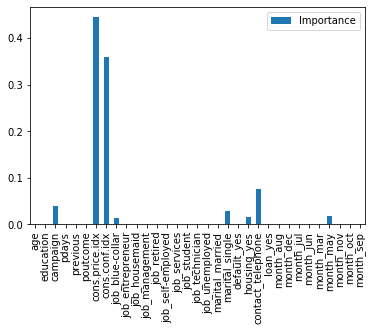

In [75]:
importance.plot(kind = 'bar')

In [77]:
final_compare= [KNN, LOGISTIC, LINEARSVM, KERNELSVM, DECISIONTREE]

In [79]:
comparison = pd.DataFrame(final_compare)
comparison.index = ['knn','logistic','linearsvm','kernelsvm-rbf','decisiontree']
comparison

,0
knn,0.674120
logistic,0.696644
linearsvm,0.528837
kernelsvm-rbf,0.544343
decisiontree,0.682985


Text(0, 0.5, 'ROC_AUC_SCORE')

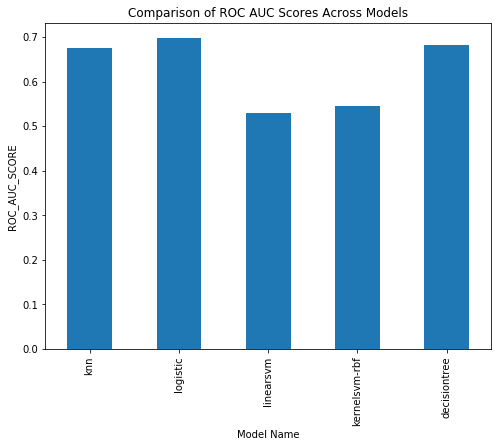

In [80]:
ax = comparison.plot(kind='bar', legend=False,figsize=(8,6), title='Comparison of ROC AUC Scores Across Models')
ax.set_xlabel("Model Name")
ax.set_ylabel("ROC_AUC_SCORE")

#### We tried the entire process for data scaled using the Standard Scaler just to check if the results were nay different, but they turned out to be very similar. Therefore, to shorten the code, we haven't added those sections in the final notebook.

## Based on the results above, we can conclude that Logistic Regression on Data scaled using Min-Max is the best model to classify our dataset.